#Librerías

In [ ]:
# Librerías
# ======================================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

# 1- Datos

##  Descarga datos

In [ ]:
url = 'https://raw.githubusercontent.com/MarianaDiazNobile/IPC/main/Base%20de%20datos_IPC_194006_202401.csv'
# Leer el archivo CSV especificando el encoding
base_total = pd.read_csv(url, encoding='ISO-8859-1', delimiter=';') #uso delimiter para especificar que el texto está separado con ;
#datos.head(5)

In [ ]:
base_total = base_total.rename(columns={'Fecha':'date', 'Pasivos remunerados': 'Pasivos'})


In [ ]:
base_total.head(5)

,date,IPC_NG,IPC_Nucleo,M0,M3,TCN,emae_des,emae_orig,Pasivos
0,1940-06,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
1,1940-07,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2,1940-08,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
3,1940-09,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
4,1940-10,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN


In [ ]:
base_total.describe()

,IPC_NG,IPC_Nucleo,M0,M3,TCN,emae_des,emae_orig,Pasivos
count,674.000000,126.000000,1.006000e+03,1.004000e+03,265.000000,241.000000,241.000000,87.000000
mean,175.192878,1011.476190,2.956866e+05,1.261347e+06,43.890566,136.887967,136.879668,5443.908046
std,685.860723,1546.026787,1.113330e+06,5.648125e+06,110.738086,14.417867,16.066984,7144.356543
min,0.000000,100.000000,0.000000e+00,0.000000e+00,2.000000,95.000000,90.000000,699.000000
25%,0.000000,198.250000,0.000000e+00,0.000000e+00,3.000000,129.000000,128.000000,1092.500000
50%,17.000000,395.500000,0.000000e+00,0.000000e+00,5.000000,144.000000,140.000000,2464.000000
75%,47.750000,1087.000000,3.127300e+04,9.345350e+04,36.000000,147.000000,148.000000,5961.000000
max,8559.000000,9680.000000,1.246370e+07,7.334990e+07,850.000000,153.000000,169.000000,30792.000000


In [ ]:
datos=base_total.copy()

In [ ]:
# Calcular la inflación mensual
datos['inflacion'],datos['Inflacion_Nucleo'] = datos['IPC_NG'].pct_change() * 100, datos['IPC_Nucleo'].pct_change() * 100
# Mostrar el DataFrame resultante
datos.tail (10)

,date,IPC_NG,IPC_Nucleo,M0,M3,TCN,emae_des,emae_orig,Pasivos,inflacion,Inflacion_Nucleo
996,2023-06,2966.0,3741.0,5885739,36687567.0,249.0,145.0,152.0,14963.0,5.364121,6.097561
997,2023-07,3168.0,4002.0,6392700,39498024.0,266.0,148.0,149.0,16144.0,6.810519,6.976744
998,2023-08,3553.0,4550.0,6621931,43232708.0,322.0,149.0,150.0,18436.0,12.152778,13.693153
999,2023-09,4045.0,5178.0,6828209,46443191.0,350.0,149.0,147.0,20193.0,13.847453,13.802198
1000,2023-10,4377.0,5633.0,7237385,48036511.0,350.0,149.0,148.0,21174.0,8.207664,8.787177
1001,2023-11,4942.0,6365.0,8973530,47203296.0,354.0,146.0,146.0,21534.0,12.908385,12.994852
1002,2023-12,6137.0,8025.0,9607992,67350834.0,642.0,142.0,139.0,25637.0,24.180494,26.080126
1003,2024-01,7551.0,9680.0,10923532,73349901.0,818.0,141.0,136.0,29880.0,23.040574,20.623053
1004,2024-02,8559.0,NaN,10541474,NaN,835.0,NaN,NaN,28049.0,13.349225,0.000000
1005,2024-03,NaN,NaN,12463695,NaN,850.0,NaN,NaN,30792.0,0.000000,0.000000


In [ ]:
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%m')
datos = datos.set_index('date')

datos = datos.asfreq('MS')
display(datos.head(4))

,IPC_NG,IPC_Nucleo,M0,M3,TCN,emae_des,emae_orig,Pasivos,inflacion,Inflacion_Nucleo
date,,,,,,,,,,
1940-06-01,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1940-07-01,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1940-08-01,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1940-09-01,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


##Creación nuevas variables

In [ ]:
datos['mes'] = datos.index.month

In [ ]:
datos['año'] = datos.index.year

In [ ]:
datos.columns

Index(['IPC_NG', 'IPC_Nucleo', 'M0', 'M3', 'TCN', 'emae_des', 'emae_orig',
       'Pasivos', 'inflacion', 'Inflacion_Nucleo', 'mes', 'año'],
      dtype='object')

In [ ]:
# Definimos la función que calcula los rezagos para una columna dada
def agregar_rezagos(df, columnas, rezagos):
    for columna in columnas:
        for rezago in rezagos:
            df[f'{columna}_lag{rezago}'] = df[columna].shift(rezago)
    return df

# Columnas para agregar rezagos
columnas_rezago = ['M0', 'M3', 'Pasivos']

# Rezagos a calcular
rezagos = [6, 8, 18, 24]

# Aplicamos la función para agregar los rezagos
datos_con_rezagos = agregar_rezagos(datos, columnas_rezago, rezagos)

# Mostramos las primeras filas del DataFrame resultante
print(datos_con_rezagos.head())

            IPC_NG  IPC_Nucleo  M0   M3  TCN  emae_des  emae_orig  Pasivos  \
date                                                                         
1940-06-01     NaN         NaN   0  0.0  NaN       NaN        NaN      NaN   
1940-07-01     NaN         NaN   0  0.0  NaN       NaN        NaN      NaN   
1940-08-01     NaN         NaN   0  0.0  NaN       NaN        NaN      NaN   
1940-09-01     NaN         NaN   0  0.0  NaN       NaN        NaN      NaN   
1940-10-01     NaN         NaN   0  0.0  NaN       NaN        NaN      NaN   

            inflacion  Inflacion_Nucleo  ...  M0_lag18  M0_lag24  M3_lag6  \
date                                     ...                                
1940-06-01        NaN               NaN  ...       NaN       NaN      NaN   
1940-07-01        NaN               NaN  ...       NaN       NaN      NaN   
1940-08-01        NaN               NaN  ...       NaN       NaN      NaN   
1940-09-01        NaN               NaN  ...       NaN       NaN    

In [ ]:
# Encuentra la primera fecha en la que cada columna tiene un valor diferente a NaN
primeras_fechas = datos.apply(lambda col: col.first_valid_index())

# Muestra las primeras fechas para cada columna
print(primeras_fechas)

IPC_NG             1968-01-01
IPC_Nucleo         2013-08-01
M0                 1940-06-01
M3                 1940-06-01
TCN                2002-03-01
emae_des           2004-01-01
emae_orig          2004-01-01
Pasivos            2017-01-01
inflacion          1989-12-01
Inflacion_Nucleo   2013-09-01
mes                1940-06-01
año                1940-06-01
M0_lag6            1940-12-01
M0_lag8            1941-02-01
M0_lag18           1941-12-01
M0_lag24           1942-06-01
M3_lag6            1940-12-01
M3_lag8            1941-02-01
M3_lag18           1941-12-01
M3_lag24           1942-06-01
Pasivos_lag6       2017-07-01
Pasivos_lag8       2017-09-01
Pasivos_lag18      2018-07-01
Pasivos_lag24      2019-01-01
dtype: datetime64[ns]


In [ ]:
# Encuentra la última fecha en la que cada columna tiene un valor diferente a NaN
ultimas_fechas = datos.apply(lambda col: col.last_valid_index())

# Muestra las últimas fechas para cada columna
print(ultimas_fechas)

IPC_NG             2024-02-01
IPC_Nucleo         2024-01-01
M0                 2024-03-01
M3                 2024-01-01
TCN                2024-03-01
emae_des           2024-01-01
emae_orig          2024-01-01
Pasivos            2024-03-01
inflacion          2024-03-01
Inflacion_Nucleo   2024-03-01
mes                2024-03-01
año                2024-03-01
M0_lag6            2024-03-01
M0_lag8            2024-03-01
M0_lag18           2024-03-01
M0_lag24           2024-03-01
M3_lag6            2024-03-01
M3_lag8            2024-03-01
M3_lag18           2024-03-01
M3_lag24           2024-03-01
Pasivos_lag6       2024-03-01
Pasivos_lag8       2024-03-01
Pasivos_lag18      2024-03-01
Pasivos_lag24      2024-03-01
dtype: datetime64[ns]


In [ ]:
datos = datos.loc['2019-01-01 00:00:00':'2024-01-01 00:00:00']

In [ ]:
# Verificar que un índice temporal está completo (para ver si no hay huecos )
# ==============================================================================
(datos.index == pd.date_range(start=datos.index.min(),
                              end=datos.index.max(),
                              freq=datos.index.freq)).all()

True

# 2 -  Análisis y Visualización de los datos

In [ ]:
datos.describe()

,IPC_NG,IPC_Nucleo,M0,M3,TCN,emae_des,emae_orig,Pasivos,inflacion,Inflacion_Nucleo,...,M0_lag18,M0_lag24,M3_lag6,M3_lag8,M3_lag18,M3_lag24,Pasivos_lag6,Pasivos_lag8,Pasivos_lag18,Pasivos_lag24
count,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000,61.000000,61.000000,61.000000
mean,1484.295082,1861.754098,3.514819e+06,1.765433e+07,139.540984,142.180328,142.098361,6404.557377,5.249051,5.400596,...,1.990637e+06,1.695906e+06,1.274512e+07,1.161640e+07,7.770944e+06,6.369988e+06,4245.557377,3772.278689,2305.442623,1849.180328
std,1455.229585,1883.473880,2.149211e+06,1.538333e+07,136.660964,8.601372,9.994507,6715.565981,4.285044,4.312817,...,9.465426e+05,7.854854e+05,9.072599e+06,7.891898e+06,4.435021e+06,3.473007e+06,3880.027721,3298.322296,1579.970775,1191.764791
min,363.000000,424.000000,1.296173e+06,4.712438e+06,37.000000,106.000000,113.000000,849.000000,0.857633,1.001431,...,8.322740e+05,7.547520e+05,3.844518e+06,3.527348e+06,2.695946e+06,2.490860e+06,727.000000,727.000000,727.000000,699.000000
25%,583.000000,699.000000,2.131292e+06,6.987815e+06,66.000000,140.000000,135.000000,1993.000000,2.977667,3.068862,...,1.238891e+06,1.002919e+06,5.360525e+06,5.221248e+06,4.387496e+06,3.386337e+06,1245.000000,1150.000000,1087.000000,979.000000
50%,919.000000,1128.000000,2.783079e+06,1.175787e+07,96.000000,144.000000,143.000000,3877.000000,3.962264,4.273504,...,1.716134e+06,1.387243e+06,9.662324e+06,8.727909e+06,5.975079e+06,5.165144e+06,2789.000000,2565.000000,1322.000000,1245.000000
75%,1818.000000,2261.000000,4.316999e+06,2.248605e+07,153.000000,148.000000,149.000000,8529.000000,5.807365,6.097561,...,2.481310e+06,2.370115e+06,1.598932e+07,1.487867e+07,1.060664e+07,8.635186e+06,5203.000000,4678.000000,3552.000000,2546.000000
max,7551.000000,9680.000000,1.092353e+07,7.334990e+07,818.000000,152.000000,164.000000,29880.000000,24.180494,26.080126,...,4.316999e+06,3.654036e+06,3.949802e+07,3.392502e+07,1.917289e+07,1.455182e+07,16144.000000,13605.000000,6537.000000,4678.000000


#### M0

<ipython-input-18-1dcef41a9d0a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos.sort_values('date'), x='date', y='M0', estimator=np.sum, ci=None)


Text(0.5, 1.0, 'M0')

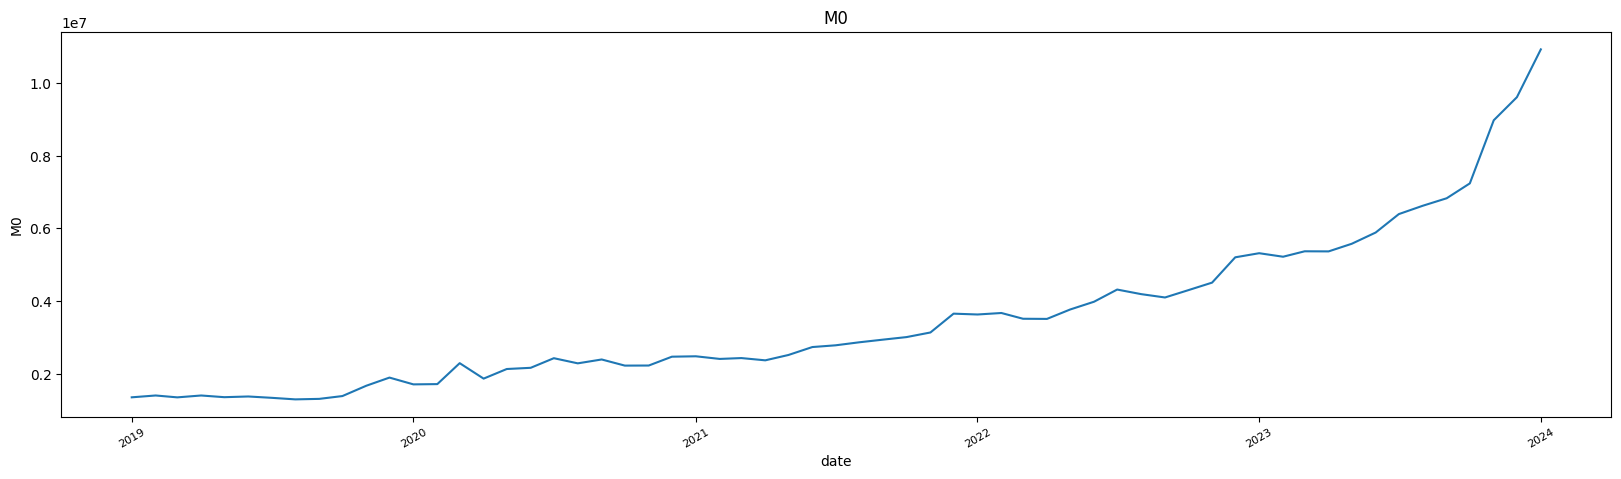

In [ ]:
fig = plt.figure(figsize=(20, 5))

sns.lineplot(data=datos.sort_values('date'), x='date', y='M0', estimator=np.sum, ci=None)
plt.xticks(rotation=30, size=8);
plt.title('M0')

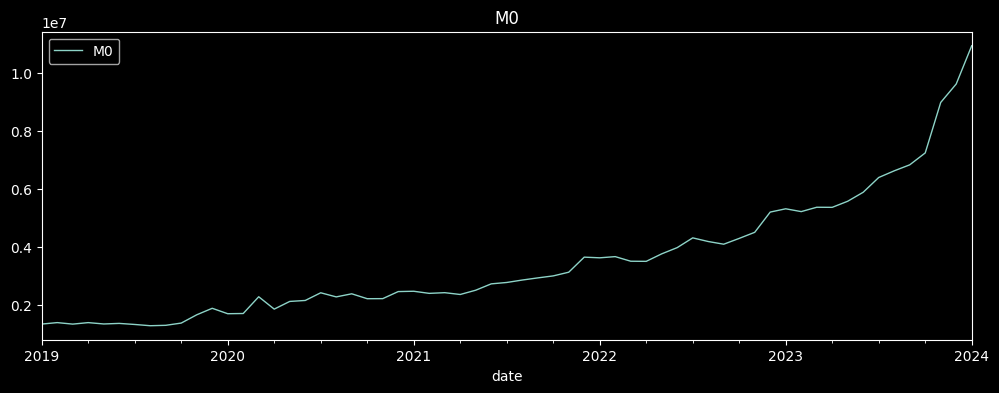

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 4))
datos.M0.plot(ax=ax, label='M0', linewidth=1)
ax.set_title('M0')
ax.legend();

<Axes: xlabel='M0'>

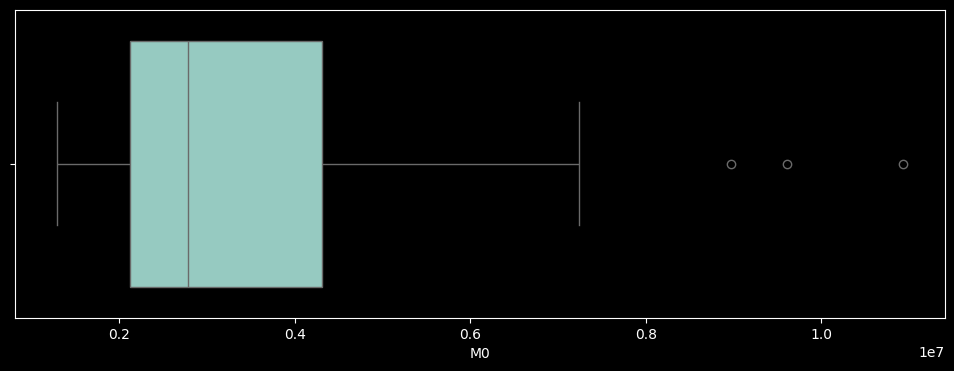

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos['M0'])

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = datos['M0'].quantile(0.25)
Q3 = datos['M0'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = datos[(datos['M0'] < lower_bound) | (datos['M0'] > upper_bound)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
            IPC_NG  IPC_Nucleo        M0          M3    TCN  emae_des  \
date                                                                    
2023-11-01  4942.0      6365.0   8973530  47203296.0  354.0     146.0   
2023-12-01  6137.0      8025.0   9607992  67350834.0  642.0     142.0   
2024-01-01  7551.0      9680.0  10923532  73349901.0  818.0     141.0   

            emae_orig  Pasivos  inflacion  Inflacion_Nucleo  ...   M0_lag18  \
date                                                         ...              
2023-11-01      146.0  21534.0  12.908385         12.994852  ...  3767809.0   
2023-12-01      139.0  25637.0  24.180494         26.080126  ...  3981921.0   
2024-01-01      136.0  29880.0  23.040574         20.623053  ...  4316999.0   

             M0_lag24     M3_lag6     M3_lag8    M3_lag18    M3_lag24  \
date                                                                    
2023-11-01  3136142.0  33925021.0  29598631.0  16848859.0  13297156.0   
2

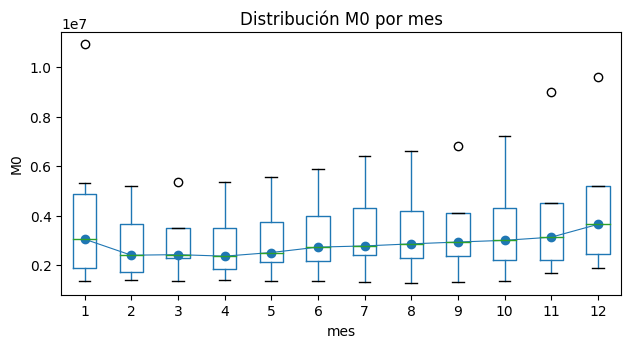

In [ ]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 3.5))
#datos['mes'] = datos.index.month
datos.boxplot(column='M0', by='mes', ax=ax,)
datos.groupby('mes')['M0'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('M0')
ax.set_title('Distribución M0 por mes')
fig.suptitle('');

<ipython-input-23-0c59faeae9f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


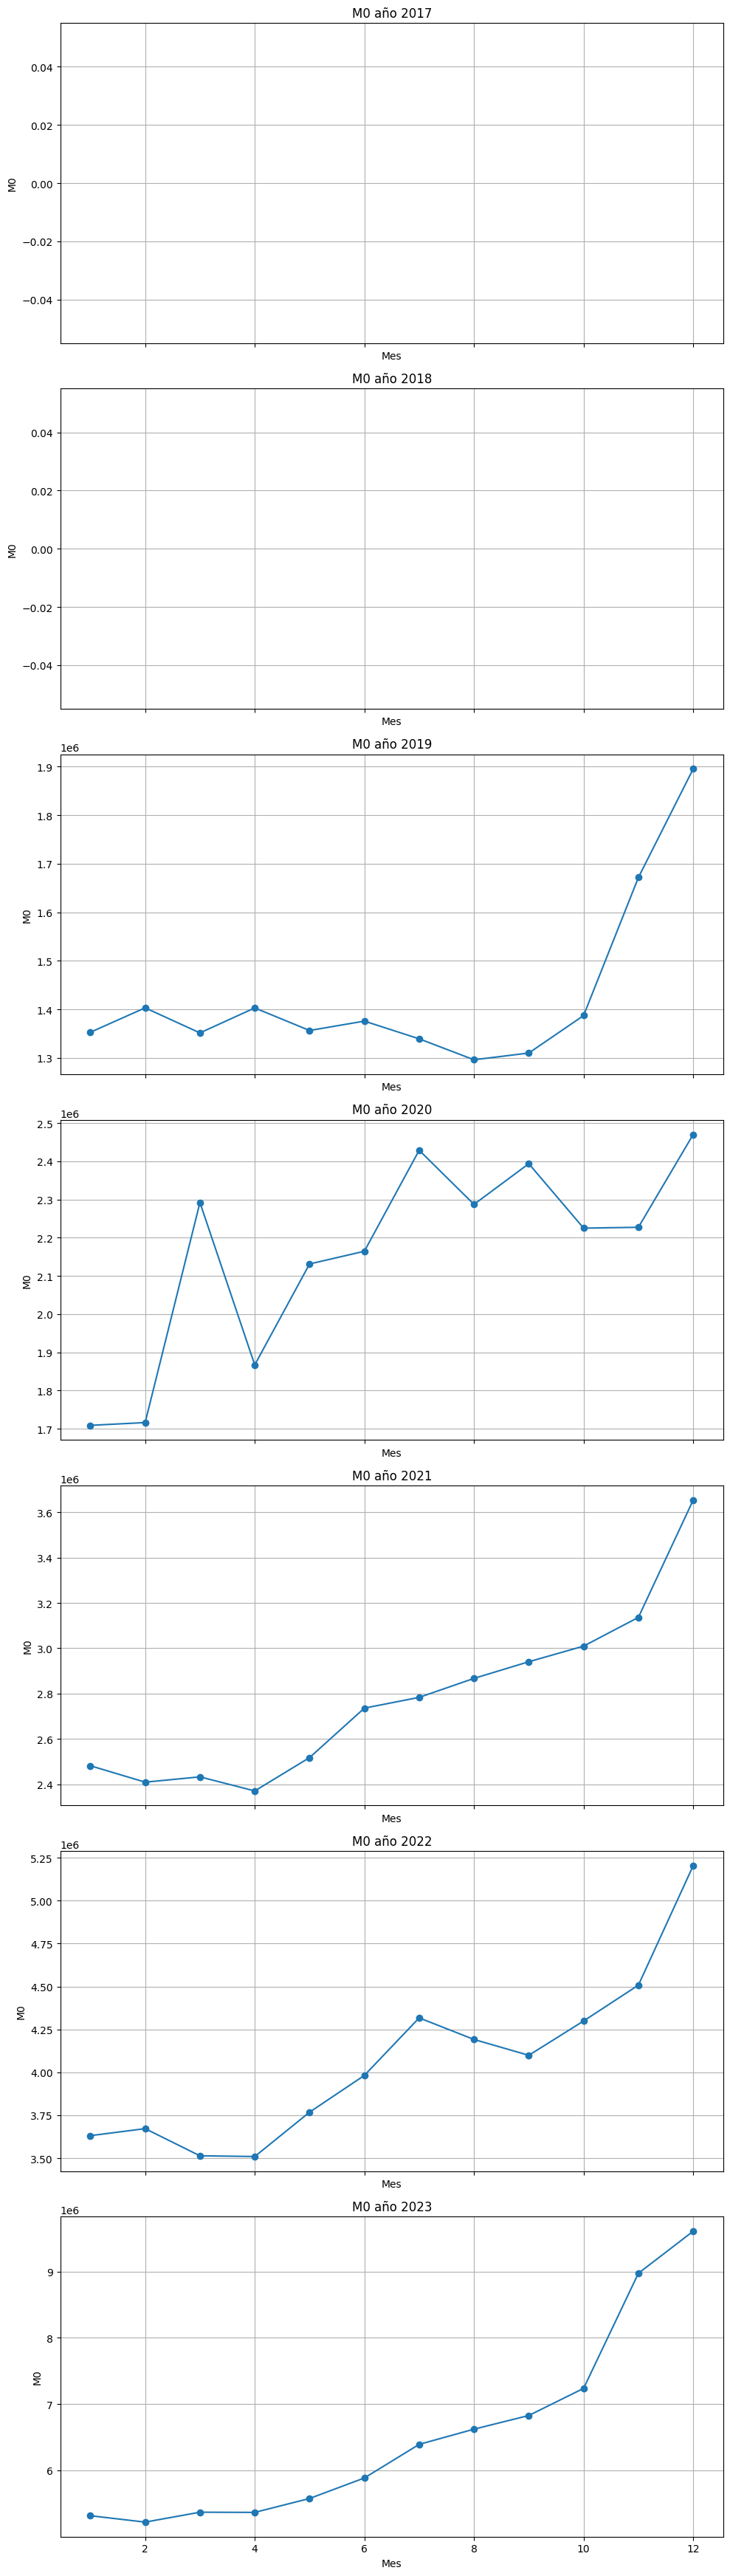

In [ ]:
datos['año'] = datos.index.year
años = range(2017, 2024)  # Rango de años seleccionado
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['M0'], marker='o', linestyle='-')
    ax.set_title(f'M0 año {año}')
    ax.set_ylabel('M0')
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

###M3

<ipython-input-24-729a75e25c83>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos.sort_values('date'), x='date', y='M3', estimator=np.sum, ci=None)


Text(0.5, 1.0, 'M3')

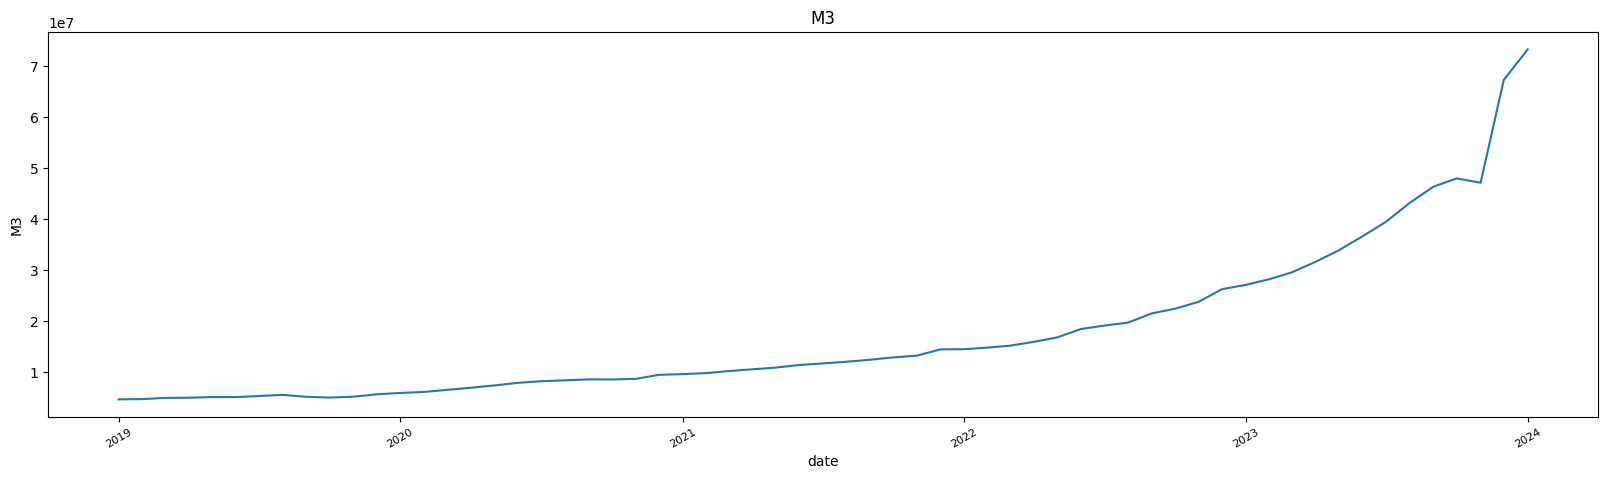

In [ ]:
fig = plt.figure(figsize=(20, 5))

sns.lineplot(data=datos.sort_values('date'), x='date', y='M3', estimator=np.sum, ci=None)
plt.xticks(rotation=30, size=8);
plt.title('M3')

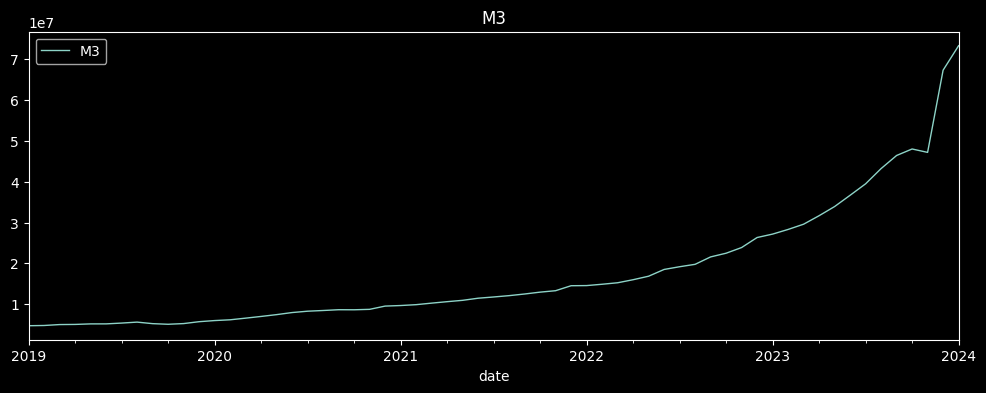

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 4))
datos.M3.plot(ax=ax, label='M3', linewidth=1)
ax.set_title('M3')
ax.legend();

<Axes: xlabel='M3'>

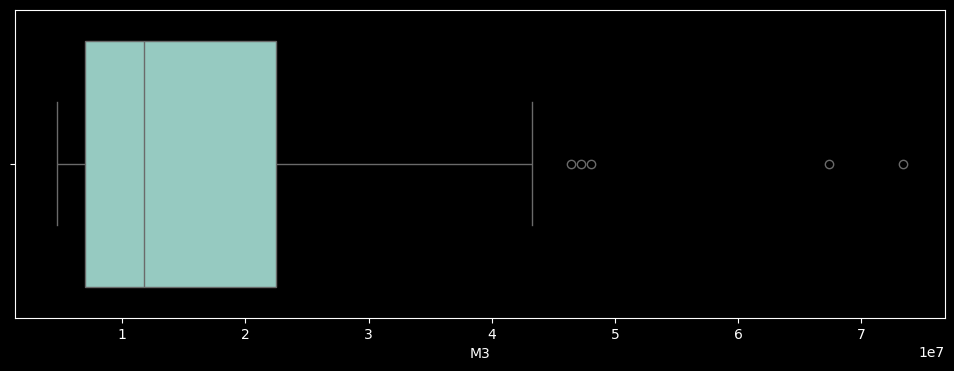

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos['M3'])

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = datos['M3'].quantile(0.25)
Q3 = datos['M3'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = datos[(datos['M3'] < lower_bound) | (datos['M3'] > upper_bound)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
            IPC_NG  IPC_Nucleo        M0          M3    TCN  emae_des  \
date                                                                    
2023-09-01  4045.0      5178.0   6828209  46443191.0  350.0     149.0   
2023-10-01  4377.0      5633.0   7237385  48036511.0  350.0     149.0   
2023-11-01  4942.0      6365.0   8973530  47203296.0  354.0     146.0   
2023-12-01  6137.0      8025.0   9607992  67350834.0  642.0     142.0   
2024-01-01  7551.0      9680.0  10923532  73349901.0  818.0     141.0   

            emae_orig  Pasivos  inflacion  Inflacion_Nucleo  ...   M0_lag18  \
date                                                         ...              
2023-09-01      147.0  20193.0  13.847453         13.802198  ...  3513785.0   
2023-10-01      148.0  21174.0   8.207664          8.787177  ...  3509534.0   
2023-11-01      146.0  21534.0  12.908385         12.994852  ...  3767809.0   
2023-12-01      139.0  25637.0  24.180494         26.080126  ...  3981921.0

<ipython-input-28-f2100f32fe77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mes'] = datos.index.month


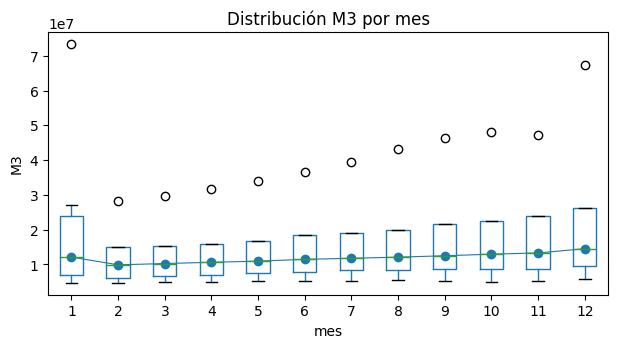

In [ ]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 3.5))
datos['mes'] = datos.index.month
datos.boxplot(column='M3', by='mes', ax=ax,)
datos.groupby('mes')['M3'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('M3')
ax.set_title('Distribución M3 por mes')
fig.suptitle('');

<ipython-input-29-58c7b0c3f8c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


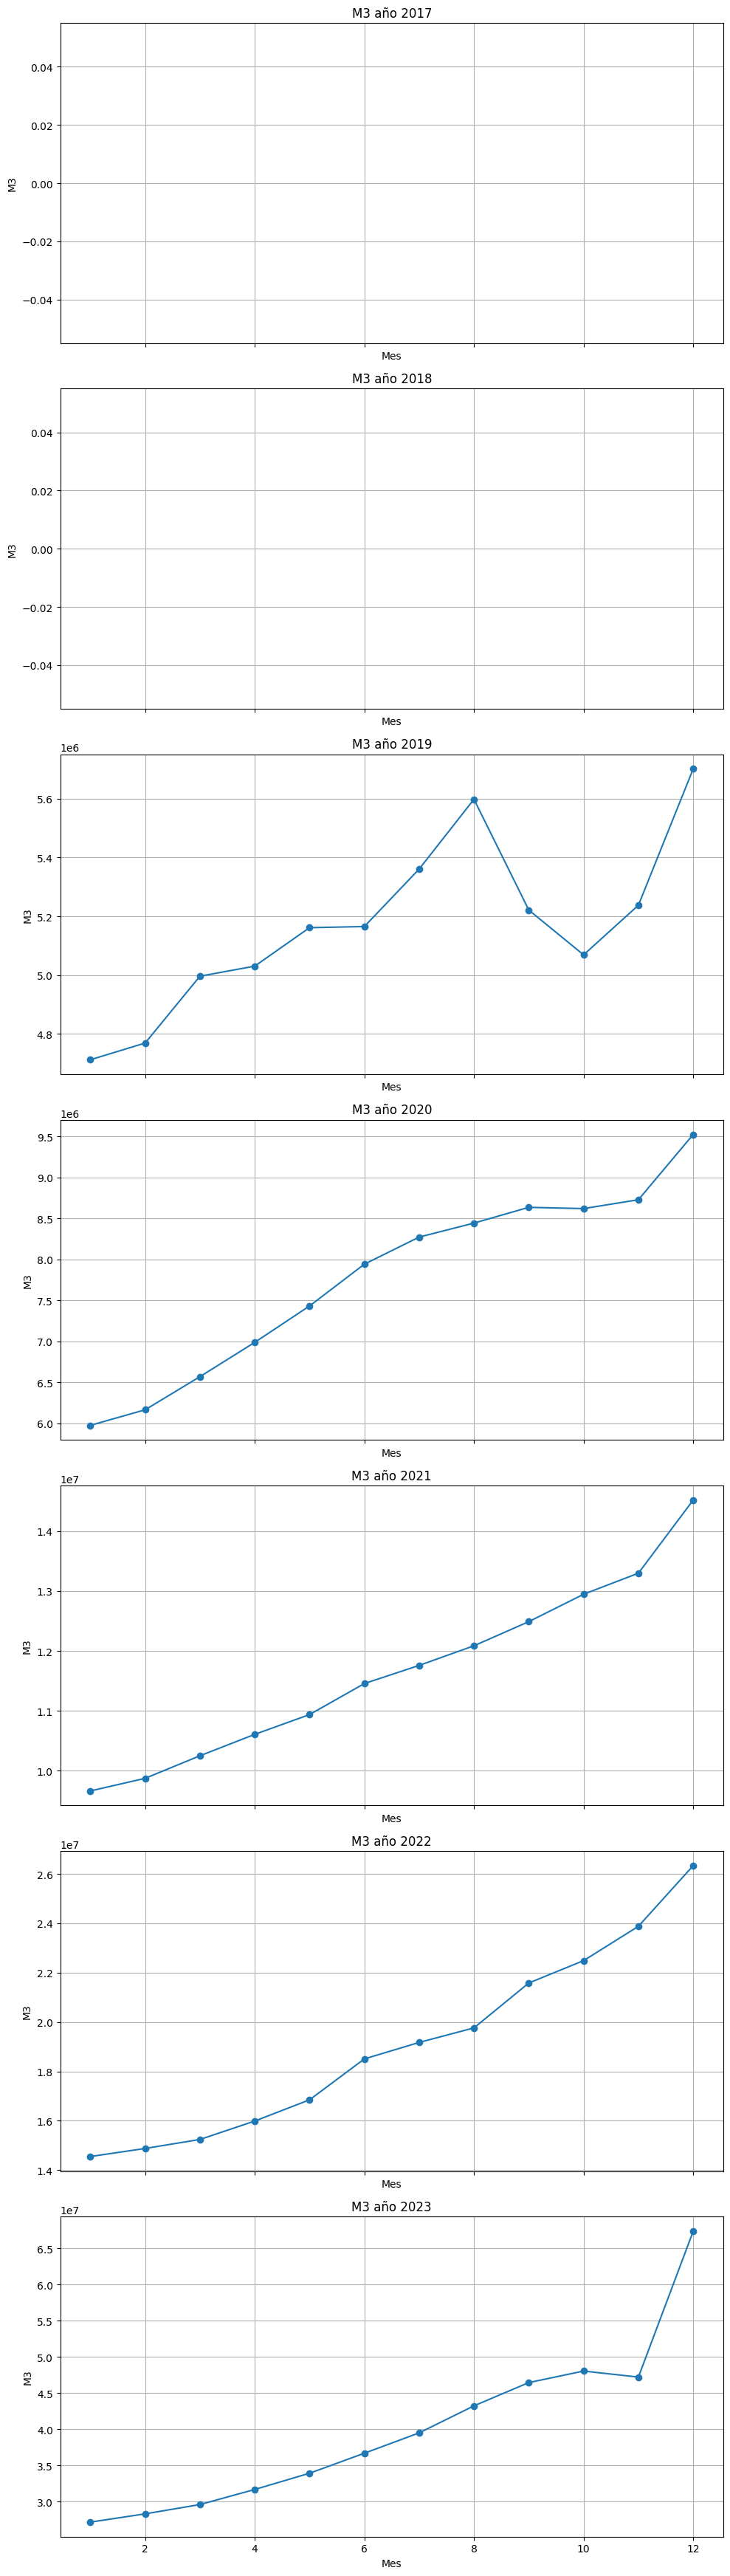

In [ ]:
datos['año'] = datos.index.year
años = range(2017, 2024)  # Rango de años seleccionado
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['M3'], marker='o', linestyle='-')
    ax.set_title(f'M3 año {año}')
    ax.set_ylabel('M3')
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

###TCN

<ipython-input-30-f60f0a18d532>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos.sort_values('date'), x='date', y='TCN', estimator=np.sum, ci=None)


Text(0.5, 1.0, 'TCN')

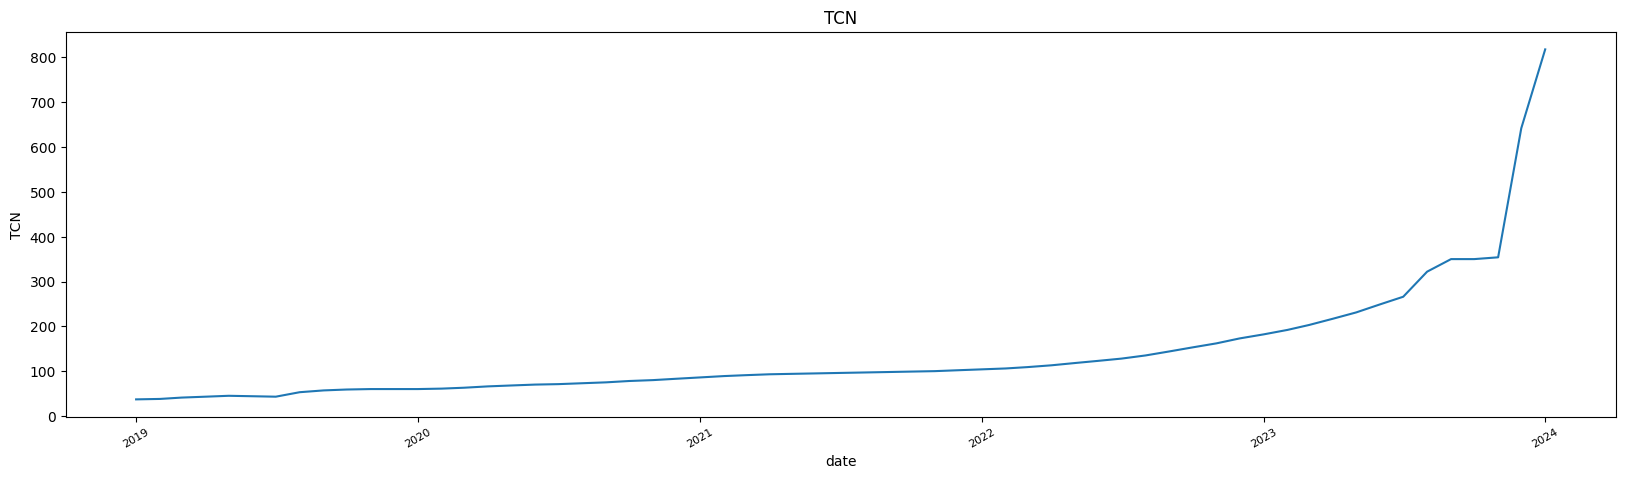

In [ ]:
fig = plt.figure(figsize=(20, 5))

sns.lineplot(data=datos.sort_values('date'), x='date', y='TCN', estimator=np.sum, ci=None)
plt.xticks(rotation=30, size=8);
plt.title('TCN')

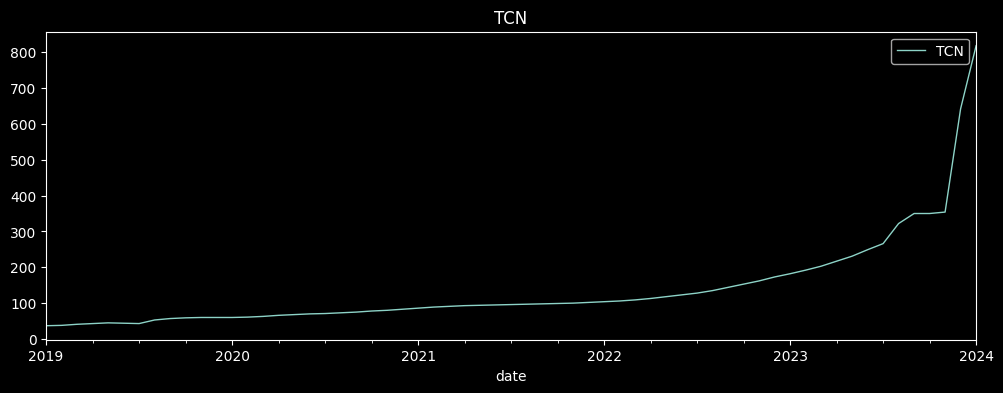

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 4))
datos.TCN.plot(ax=ax, label='TCN', linewidth=1)
ax.set_title('TCN')
ax.legend();

<Axes: xlabel='TCN'>

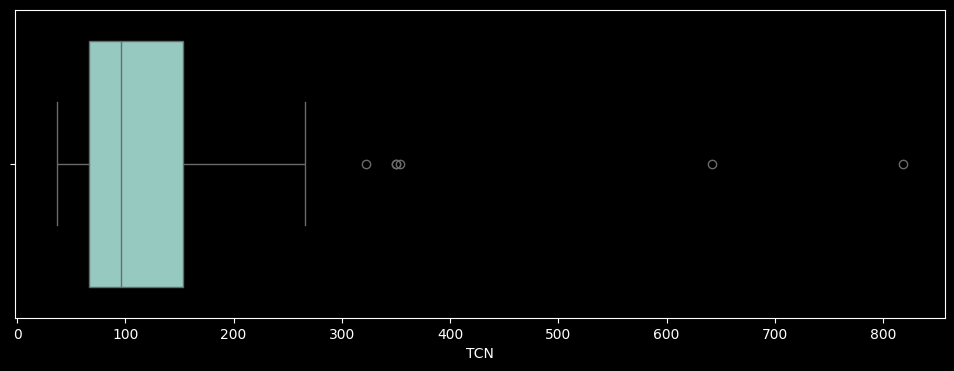

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos['TCN'])

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = datos['TCN'].quantile(0.25)
Q3 = datos['TCN'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = datos[(datos['TCN'] < lower_bound) | (datos['TCN'] > upper_bound)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
            IPC_NG  IPC_Nucleo        M0          M3    TCN  emae_des  \
date                                                                    
2023-08-01  3553.0      4550.0   6621931  43232708.0  322.0     149.0   
2023-09-01  4045.0      5178.0   6828209  46443191.0  350.0     149.0   
2023-10-01  4377.0      5633.0   7237385  48036511.0  350.0     149.0   
2023-11-01  4942.0      6365.0   8973530  47203296.0  354.0     146.0   
2023-12-01  6137.0      8025.0   9607992  67350834.0  642.0     142.0   
2024-01-01  7551.0      9680.0  10923532  73349901.0  818.0     141.0   

            emae_orig  Pasivos  inflacion  Inflacion_Nucleo  ...   M0_lag18  \
date                                                         ...              
2023-08-01      150.0  18436.0  12.152778         13.693153  ...  3672002.0   
2023-09-01      147.0  20193.0  13.847453         13.802198  ...  3513785.0   
2023-10-01      148.0  21174.0   8.207664          8.787177  ...  3509534.0   
20

<ipython-input-34-8e397f4ae566>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mes'] = datos.index.month


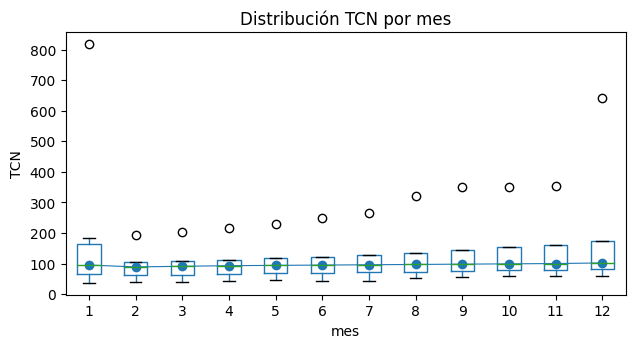

In [ ]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 3.5))
datos['mes'] = datos.index.month
datos.boxplot(column='TCN', by='mes', ax=ax,)
datos.groupby('mes')['TCN'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('TCN')
ax.set_title('Distribución TCN por mes')
fig.suptitle('');

<ipython-input-35-fbf8b2ddbe38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


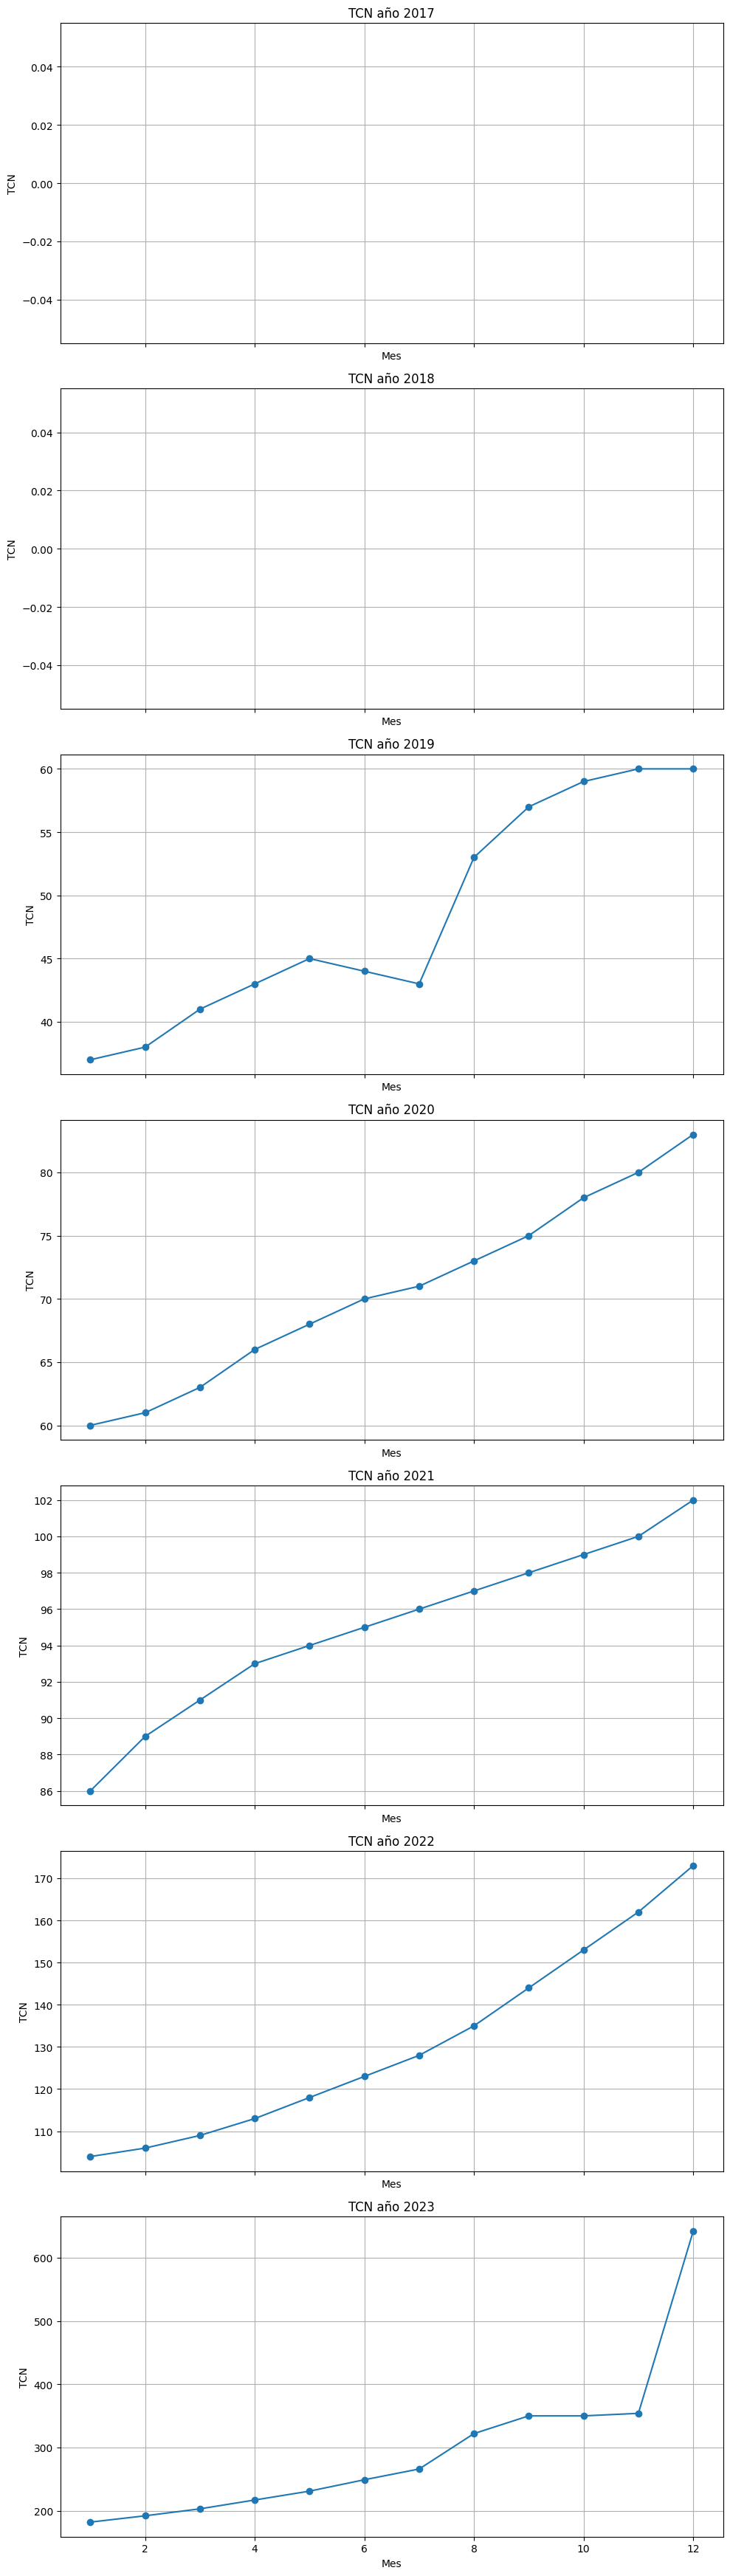

In [ ]:
datos['año'] = datos.index.year
años = range(2017, 2024)  # Rango de años seleccionado
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['TCN'], marker='o', linestyle='-')
    ax.set_title(f'TCN año {año}')
    ax.set_ylabel('TCN')
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

###emae_des

<ipython-input-36-20f3f3028562>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos.sort_values('date'), x='date', y='emae_des', estimator=np.sum, ci=None)


Text(0.5, 1.0, 'EMAE Desestacionalizado')

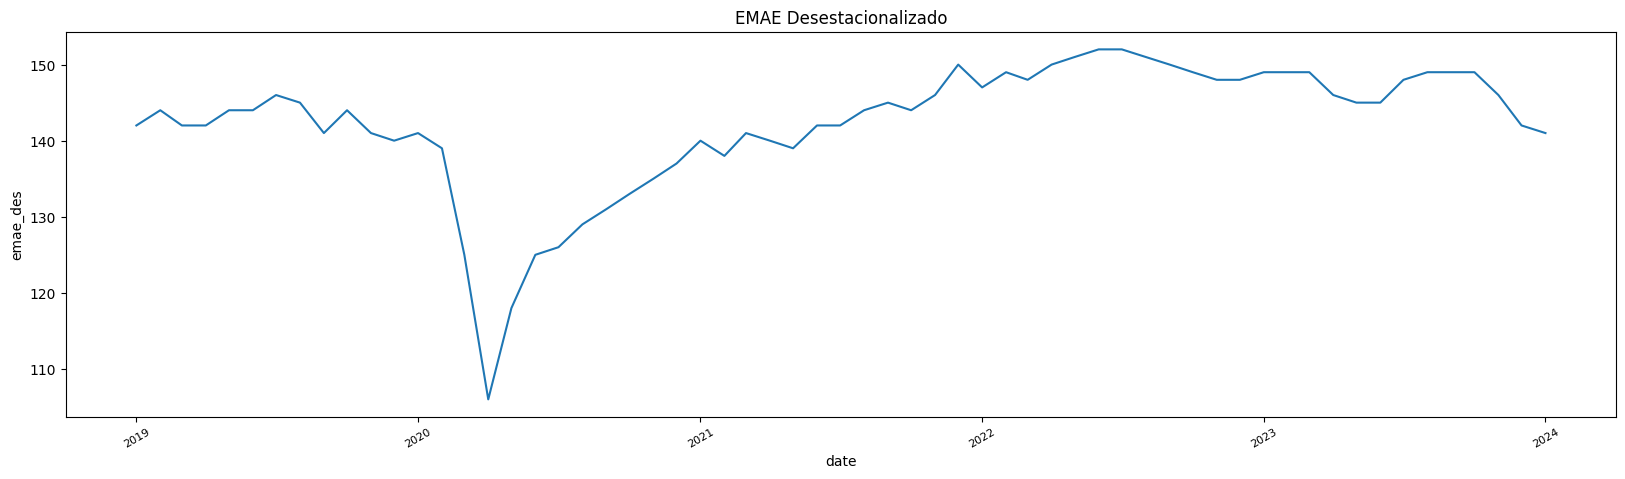

In [ ]:
fig = plt.figure(figsize=(20, 5))

sns.lineplot(data=datos.sort_values('date'), x='date', y='emae_des', estimator=np.sum, ci=None)
plt.xticks(rotation=30, size=8);
plt.title('EMAE Desestacionalizado')

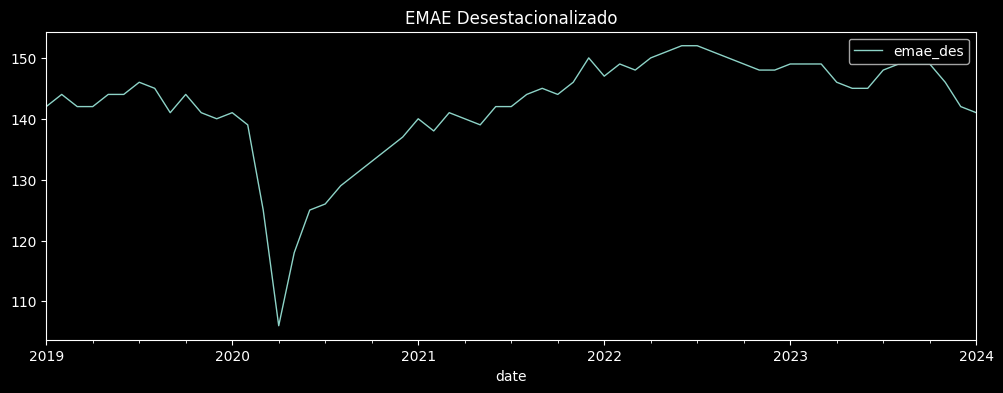

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 4))
datos.emae_des.plot(ax=ax, label='emae_des', linewidth=1)
ax.set_title('EMAE Desestacionalizado')
ax.legend();

<Axes: xlabel='emae_des'>

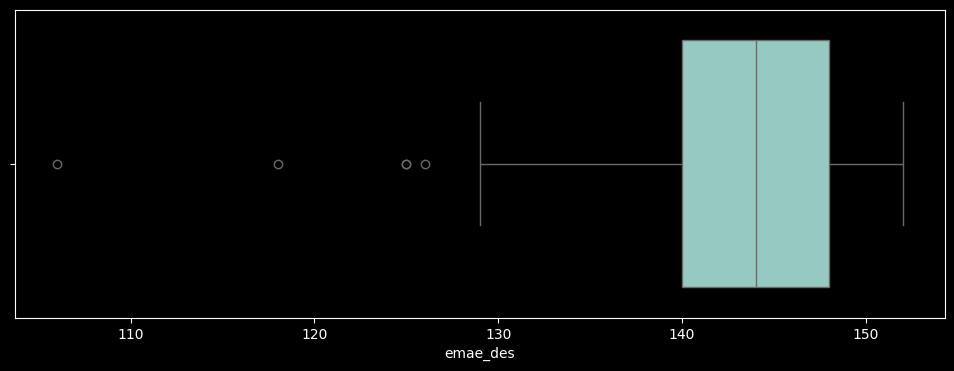

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos['emae_des'])

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = datos['emae_des'].quantile(0.25)
Q3 = datos['emae_des'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = datos[(datos['emae_des'] < lower_bound) | (datos['emae_des'] > upper_bound)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
            IPC_NG  IPC_Nucleo       M0         M3   TCN  emae_des  emae_orig  \
date                                                                            
2020-03-01   575.0       688.0  2292083  6568960.0  63.0     125.0      128.0   
2020-04-01   583.0       699.0  1867127  6987815.0  66.0     106.0      113.0   
2020-05-01   588.0       706.0  2131292  7431719.0  68.0     118.0      131.0   
2020-06-01   596.0       717.0  2164501  7941777.0  70.0     125.0      133.0   
2020-07-01   607.0       735.0  2428900  8272300.0  71.0     126.0      127.0   

            Pasivos  inflacion  Inflacion_Nucleo  ...   M0_lag18   M0_lag24  \
date                                              ...                         
2020-03-01   1277.0   2.495544          2.840060  ...  1249657.0   995473.0   
2020-04-01   1993.0   1.391304          1.598837  ...  1155082.0   999359.0   
2020-05-01   2004.0   0.857633          1.001431  ...  1238891.0  1020466.0   
2020-06-01   2374.0

<ipython-input-40-06dfd24c510a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mes'] = datos.index.month


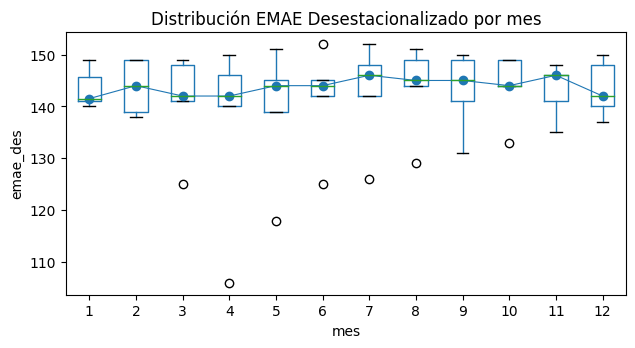

In [ ]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 3.5))
datos['mes'] = datos.index.month
datos.boxplot(column='emae_des', by='mes', ax=ax,)
datos.groupby('mes')['emae_des'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('emae_des')
ax.set_title('Distribución EMAE Desestacionalizado por mes')
fig.suptitle('');

<ipython-input-41-de865f97b22e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


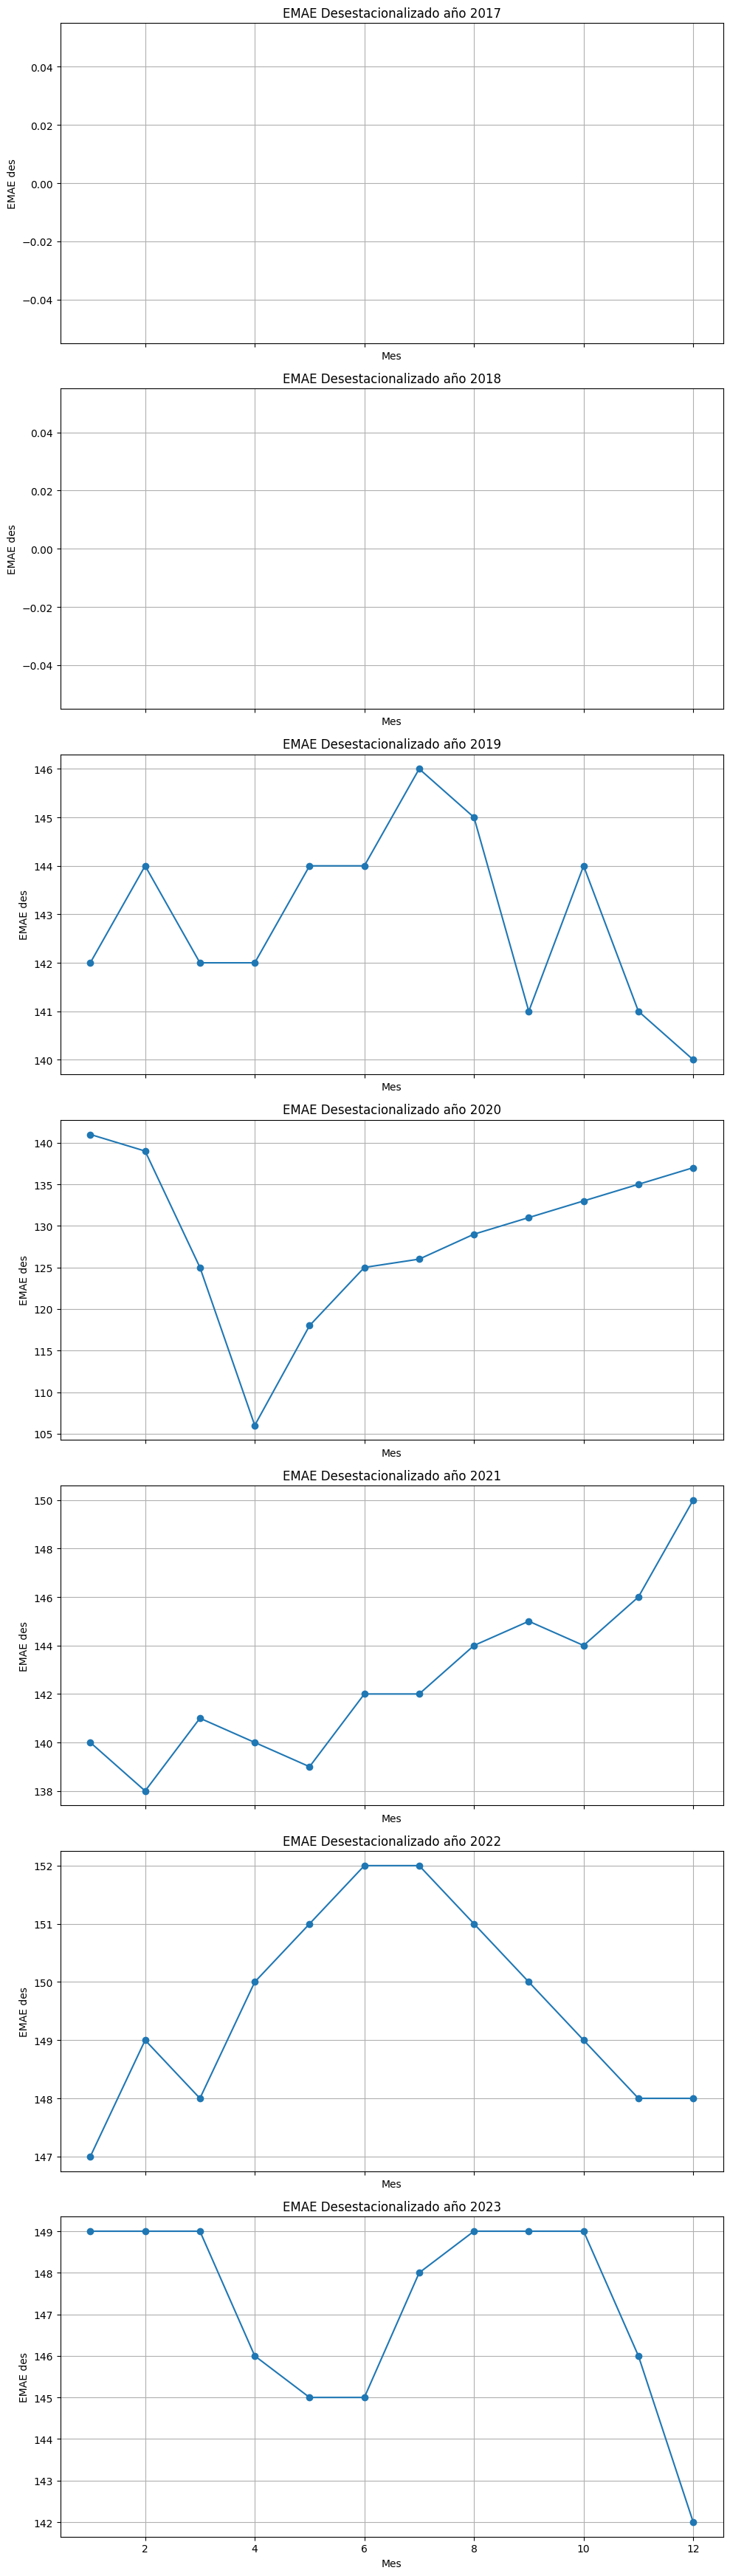

In [ ]:
datos['año'] = datos.index.year
años = range(2017, 2024)  # Rango de años seleccionado
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['emae_des'], marker='o', linestyle='-')
    ax.set_title(f'EMAE Desestacionalizado año {año}')
    ax.set_ylabel('EMAE des')
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

###emae_orig

<ipython-input-42-66519327637b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos.sort_values('date'), x='date', y='emae_orig', estimator=np.sum, ci=None)


Text(0.5, 1.0, 'EMAE ORIGINAL')

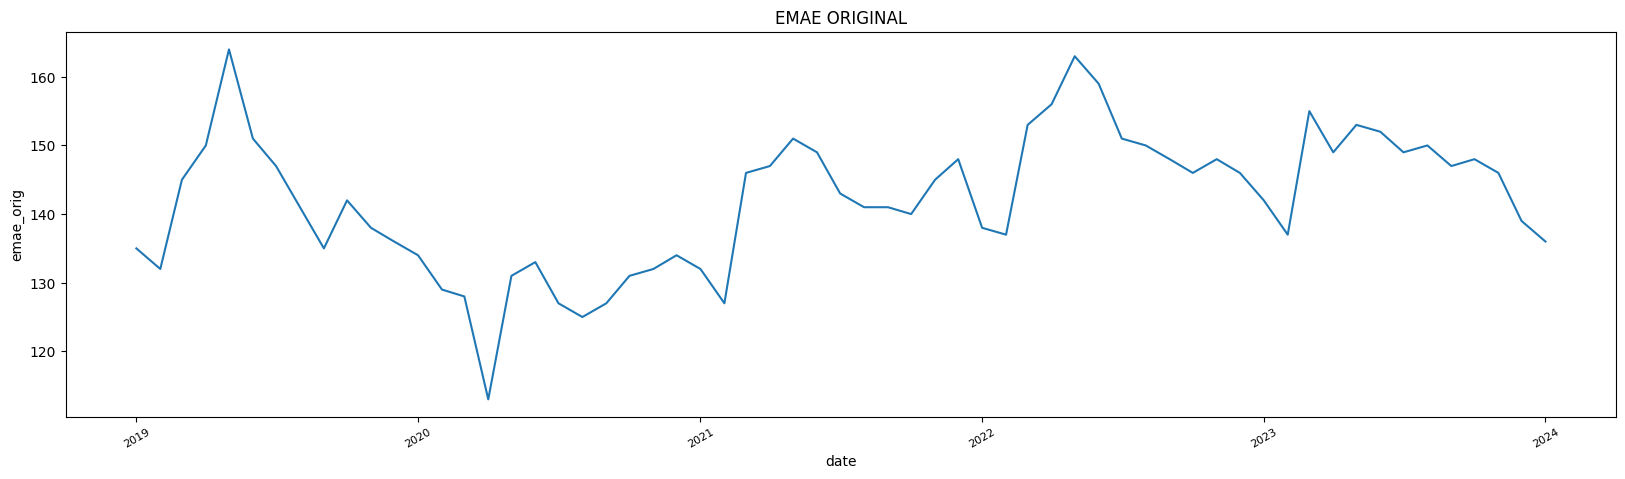

In [ ]:
fig = plt.figure(figsize=(20, 5))

sns.lineplot(data=datos.sort_values('date'), x='date', y='emae_orig', estimator=np.sum, ci=None)
plt.xticks(rotation=30, size=8);
plt.title('EMAE ORIGINAL')

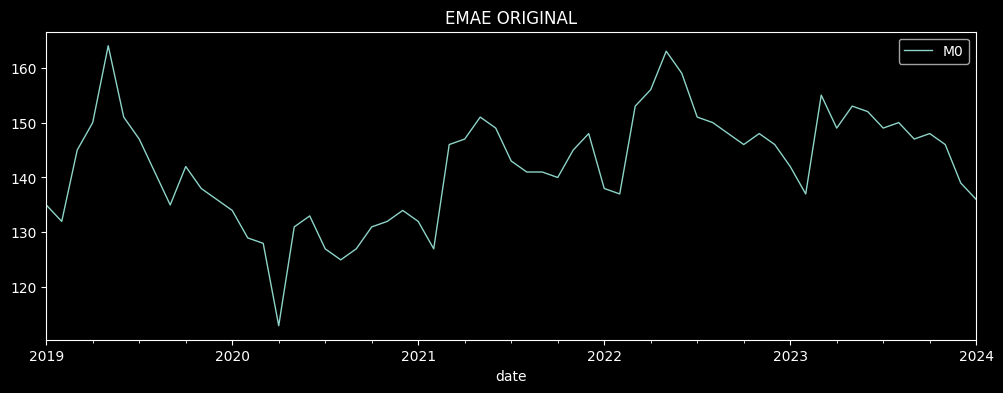

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 4))
datos.emae_orig.plot(ax=ax, label='M0', linewidth=1)
ax.set_title('EMAE ORIGINAL')
ax.legend();

<Axes: xlabel='emae_orig'>

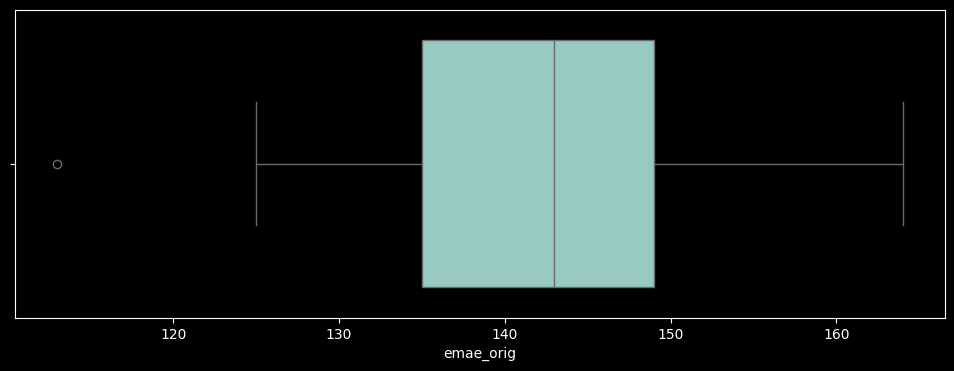

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos['emae_orig'])

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = datos['emae_orig'].quantile(0.25)
Q3 = datos['emae_orig'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = datos[(datos['emae_orig'] < lower_bound) | (datos['emae_orig'] > upper_bound)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
            IPC_NG  IPC_Nucleo       M0         M3   TCN  emae_des  emae_orig  \
date                                                                            
2020-04-01   583.0       699.0  1867127  6987815.0  66.0     106.0      113.0   

            Pasivos  inflacion  Inflacion_Nucleo  ...   M0_lag18  M0_lag24  \
date                                              ...                        
2020-04-01   1993.0   1.391304          1.598837  ...  1155082.0  999359.0   

              M3_lag6    M3_lag8   M3_lag18   M3_lag24  Pasivos_lag6  \
date                                                                   
2020-04-01  5068932.0  5597633.0  4331852.0  3386337.0        1098.0   

            Pasivos_lag8  Pasivos_lag18  Pasivos_lag24  
date                                                    
2020-04-01        1245.0          863.0         1259.0  

[1 rows x 24 columns]


<ipython-input-46-77160bf46e8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mes'] = datos.index.month


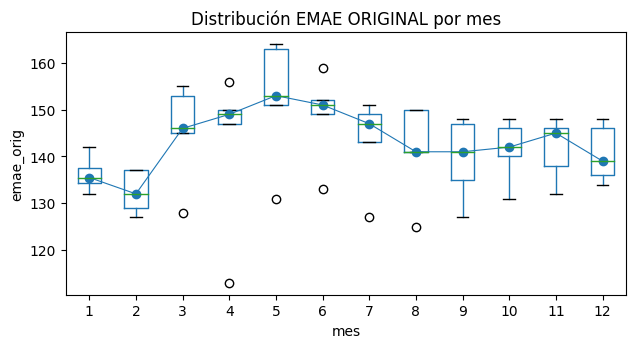

In [ ]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 3.5))
datos['mes'] = datos.index.month
datos.boxplot(column='emae_orig', by='mes', ax=ax,)
datos.groupby('mes')['emae_orig'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('emae_orig')
ax.set_title('Distribución EMAE ORIGINAL por mes')
fig.suptitle('');

<ipython-input-47-ad4f632388a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


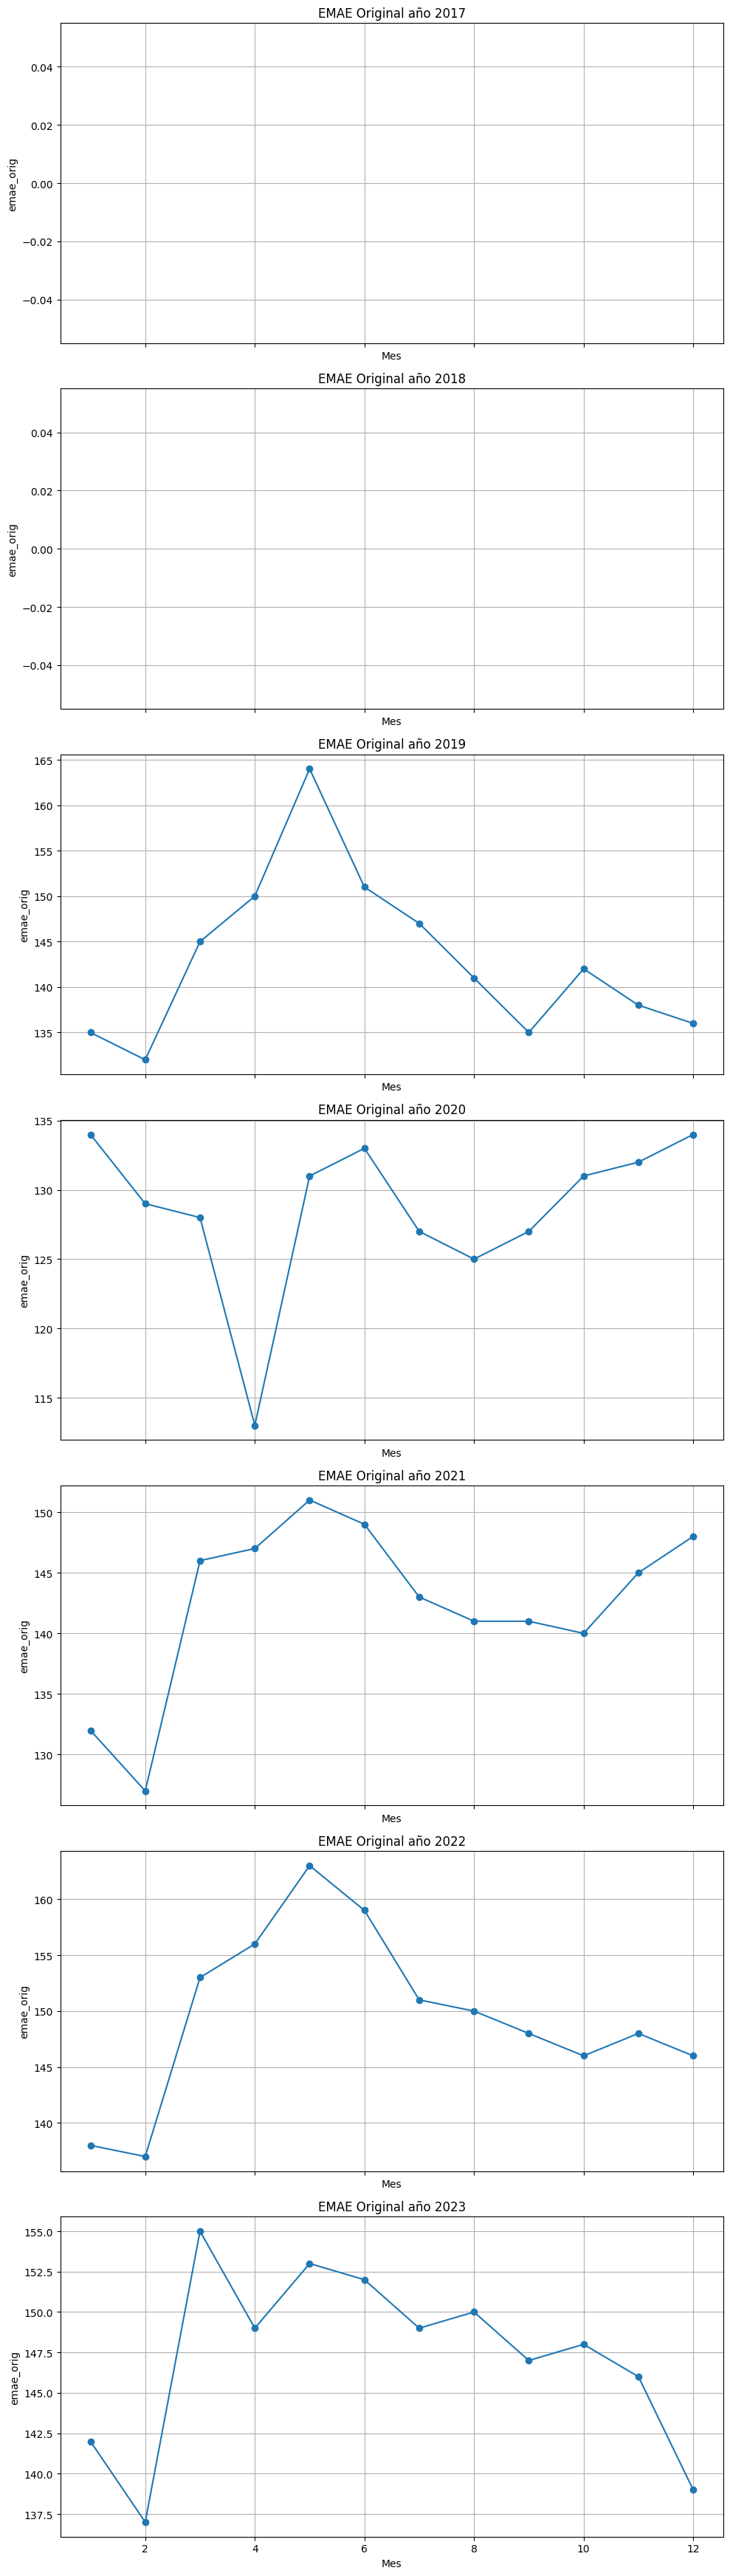

In [ ]:
datos['año'] = datos.index.year
años = range(2017, 2024)  # Rango de años seleccionado
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['emae_orig'], marker='o', linestyle='-')
    ax.set_title(f'EMAE Original año {año}')
    ax.set_ylabel('emae_orig')
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

###Pasivos

<ipython-input-48-7675ad35d7d8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos.sort_values('date'), x='date', y='Pasivos', estimator=np.sum, ci=None)


Text(0.5, 1.0, 'Pasivos')

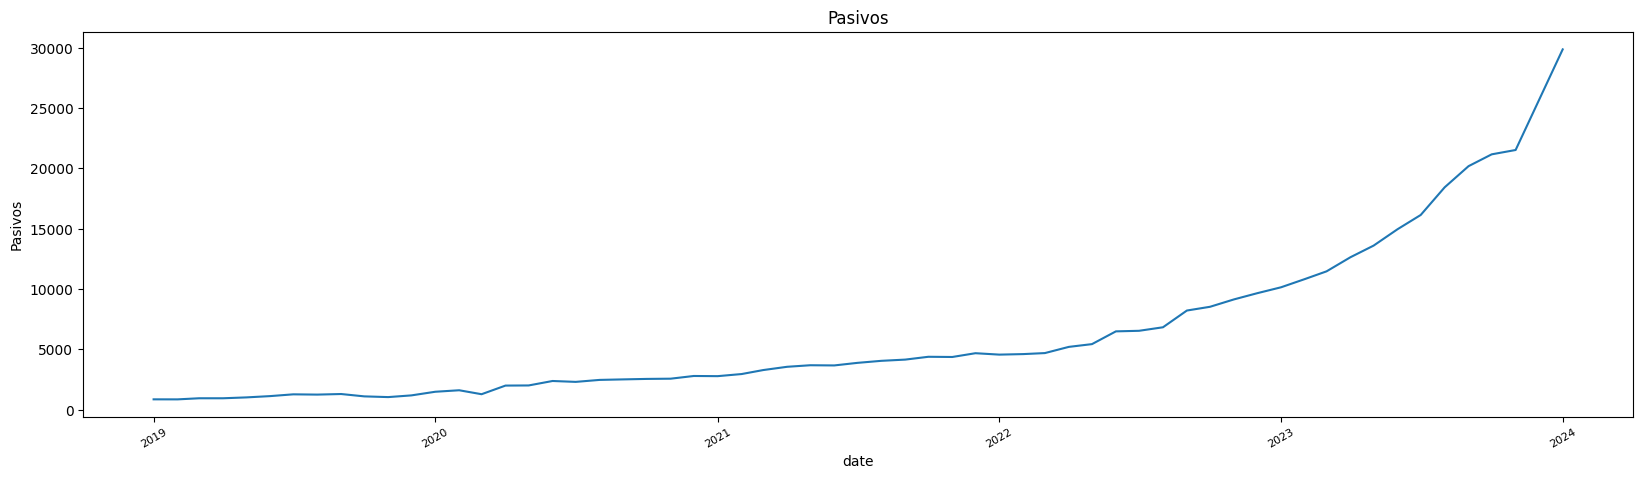

In [ ]:
fig = plt.figure(figsize=(20, 5))

sns.lineplot(data=datos.sort_values('date'), x='date', y='Pasivos', estimator=np.sum, ci=None)
plt.xticks(rotation=30, size=8);
plt.title('Pasivos')

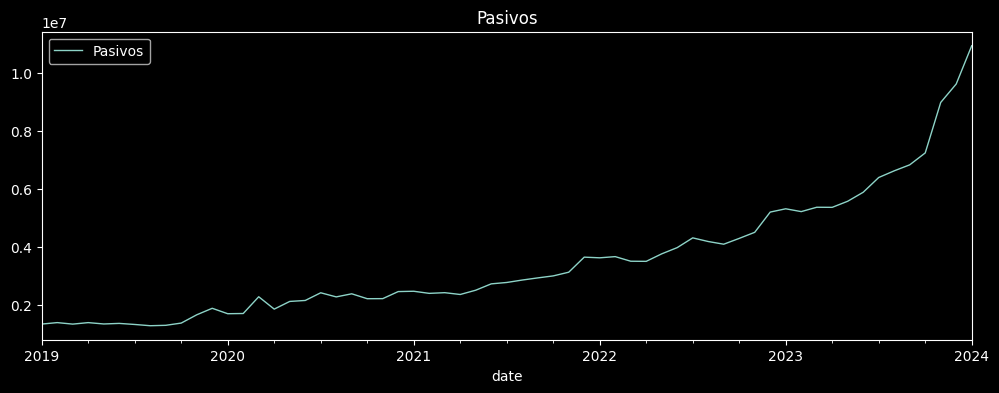

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 4))
datos.M0.plot(ax=ax, label='Pasivos', linewidth=1)
ax.set_title('Pasivos')
ax.legend();

<Axes: xlabel='Pasivos'>

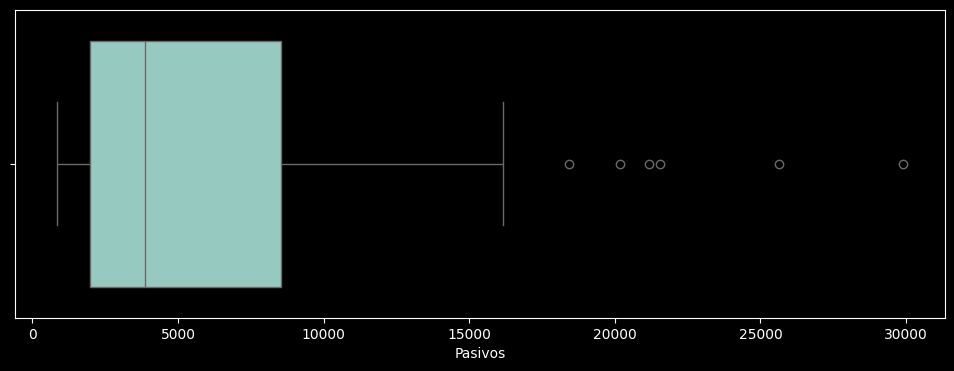

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos['Pasivos'])

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = datos['Pasivos'].quantile(0.25)
Q3 = datos['Pasivos'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = datos[(datos['Pasivos'] < lower_bound) | (datos['Pasivos'] > upper_bound)]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
            IPC_NG  IPC_Nucleo        M0          M3    TCN  emae_des  \
date                                                                    
2023-08-01  3553.0      4550.0   6621931  43232708.0  322.0     149.0   
2023-09-01  4045.0      5178.0   6828209  46443191.0  350.0     149.0   
2023-10-01  4377.0      5633.0   7237385  48036511.0  350.0     149.0   
2023-11-01  4942.0      6365.0   8973530  47203296.0  354.0     146.0   
2023-12-01  6137.0      8025.0   9607992  67350834.0  642.0     142.0   
2024-01-01  7551.0      9680.0  10923532  73349901.0  818.0     141.0   

            emae_orig  Pasivos  inflacion  Inflacion_Nucleo  ...   M0_lag18  \
date                                                         ...              
2023-08-01      150.0  18436.0  12.152778         13.693153  ...  3672002.0   
2023-09-01      147.0  20193.0  13.847453         13.802198  ...  3513785.0   
2023-10-01      148.0  21174.0   8.207664          8.787177  ...  3509534.0   
20

<ipython-input-52-e55c1ac30266>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['mes'] = datos.index.month


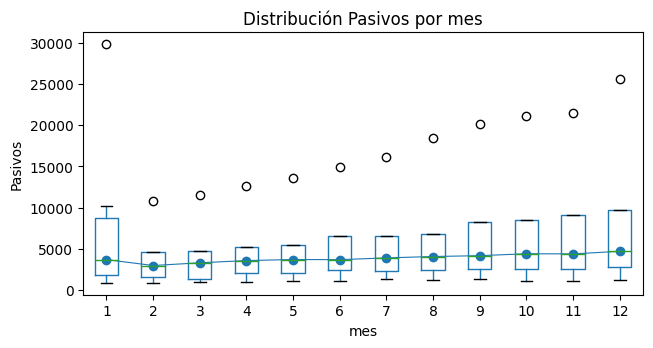

In [ ]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 3.5))
datos['mes'] = datos.index.month
datos.boxplot(column='Pasivos', by='mes', ax=ax,)
datos.groupby('mes')['Pasivos'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Pasivos')
ax.set_title('Distribución Pasivos por mes')
fig.suptitle('');

<ipython-input-53-3d53a2d693a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


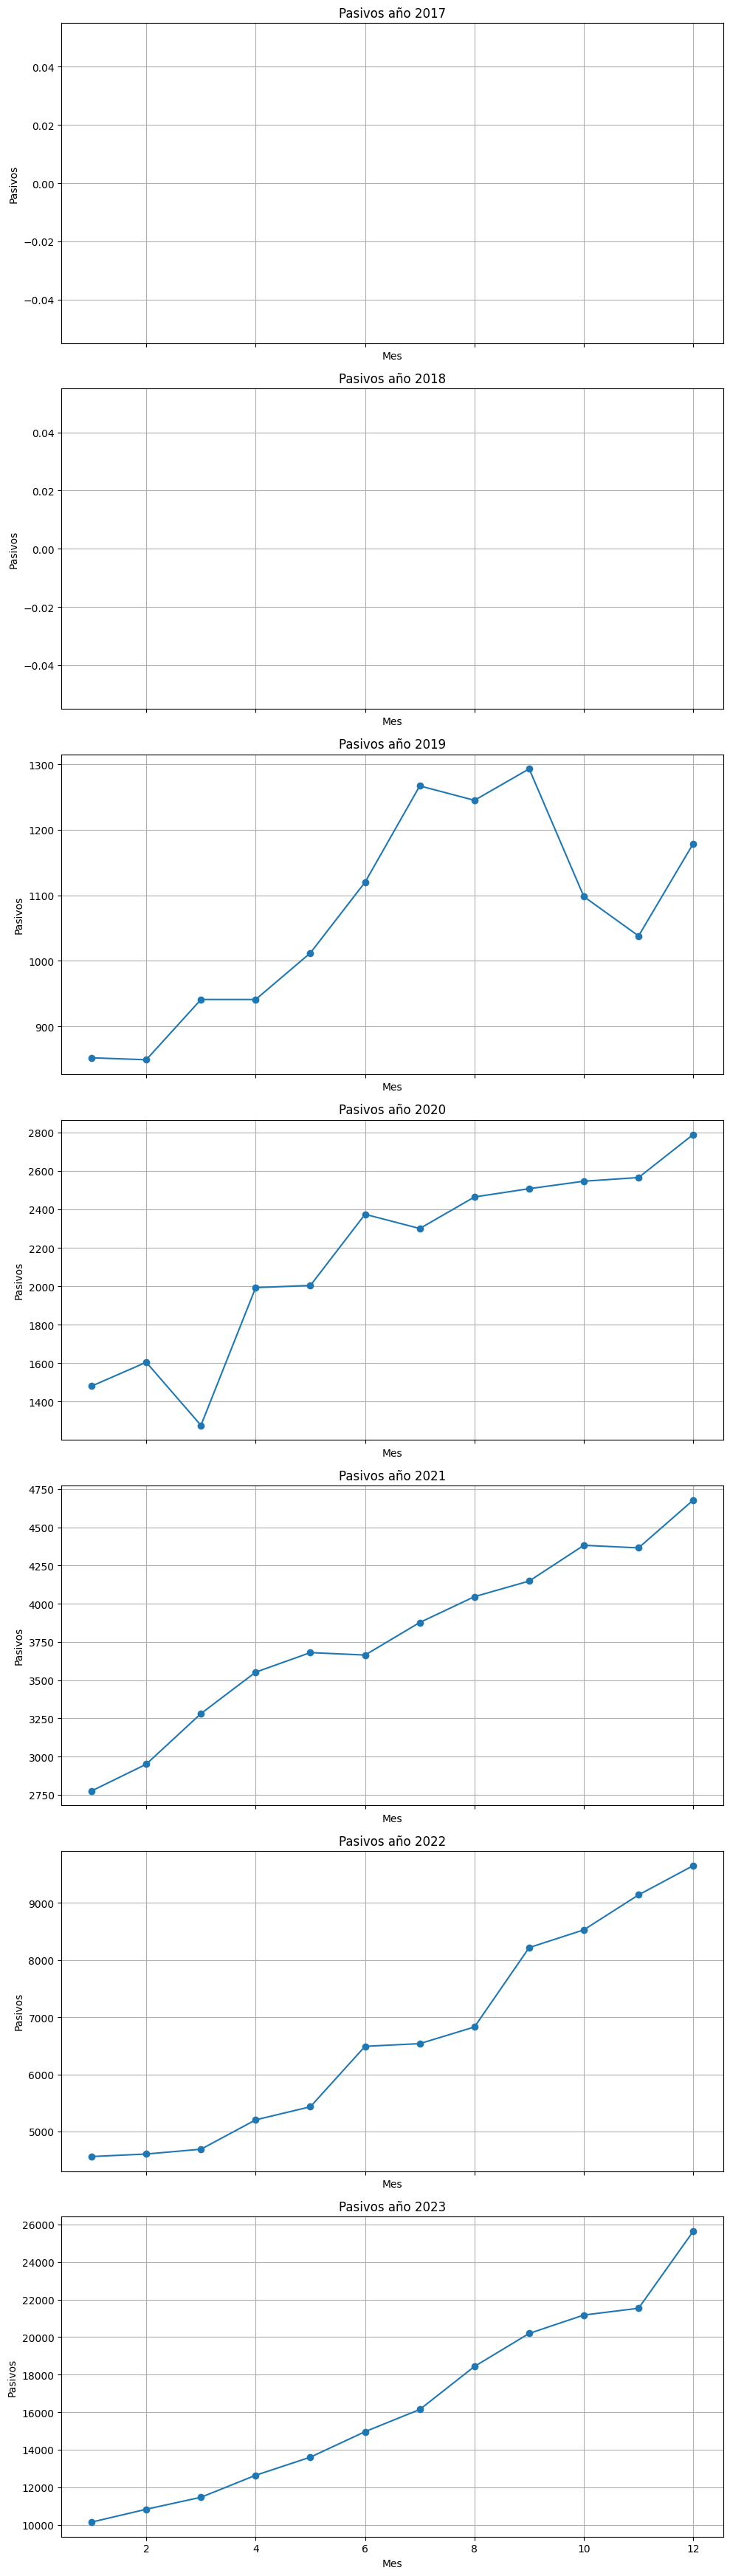

In [ ]:
datos['año'] = datos.index.year
años = range(2017, 2024)  # Rango de años seleccionado
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['Pasivos'], marker='o', linestyle='-')
    ax.set_title(f'Pasivos año {año}')
    ax.set_ylabel('Pasivos')
    ax.set_xlabel('Mes')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Análisis correlación

In [ ]:
correlation_matrix = datos.corr()

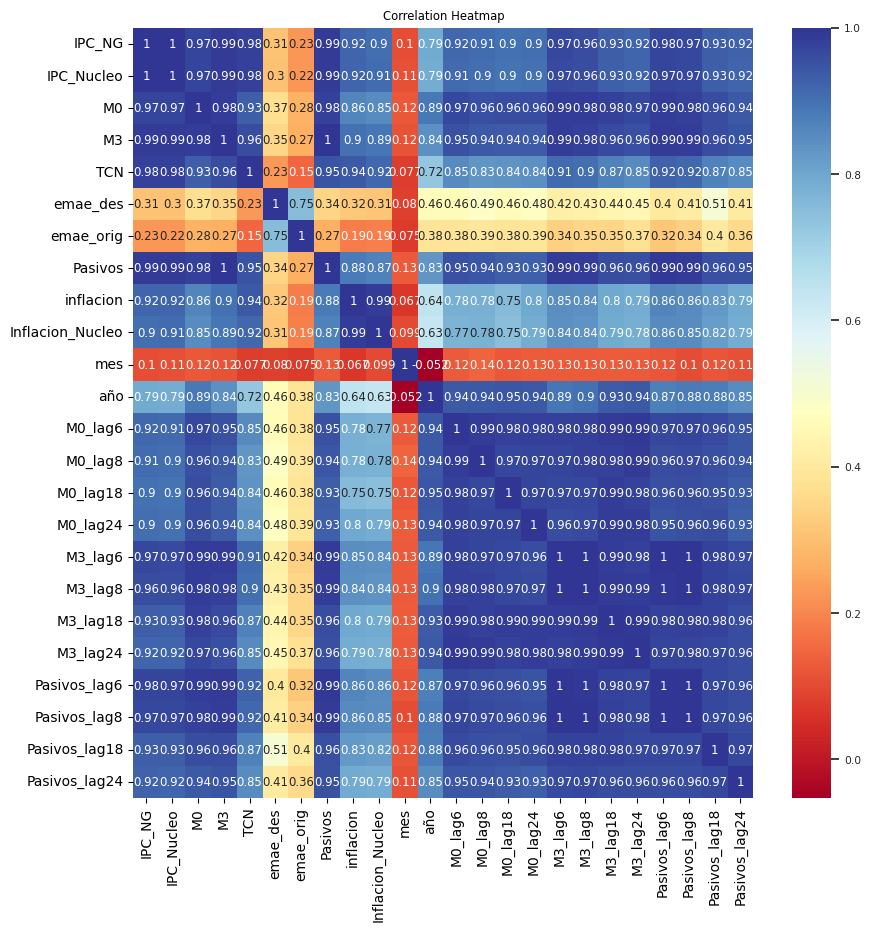

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=0.7)
#plt.show()

ax =  sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-56-ef37655d1daf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


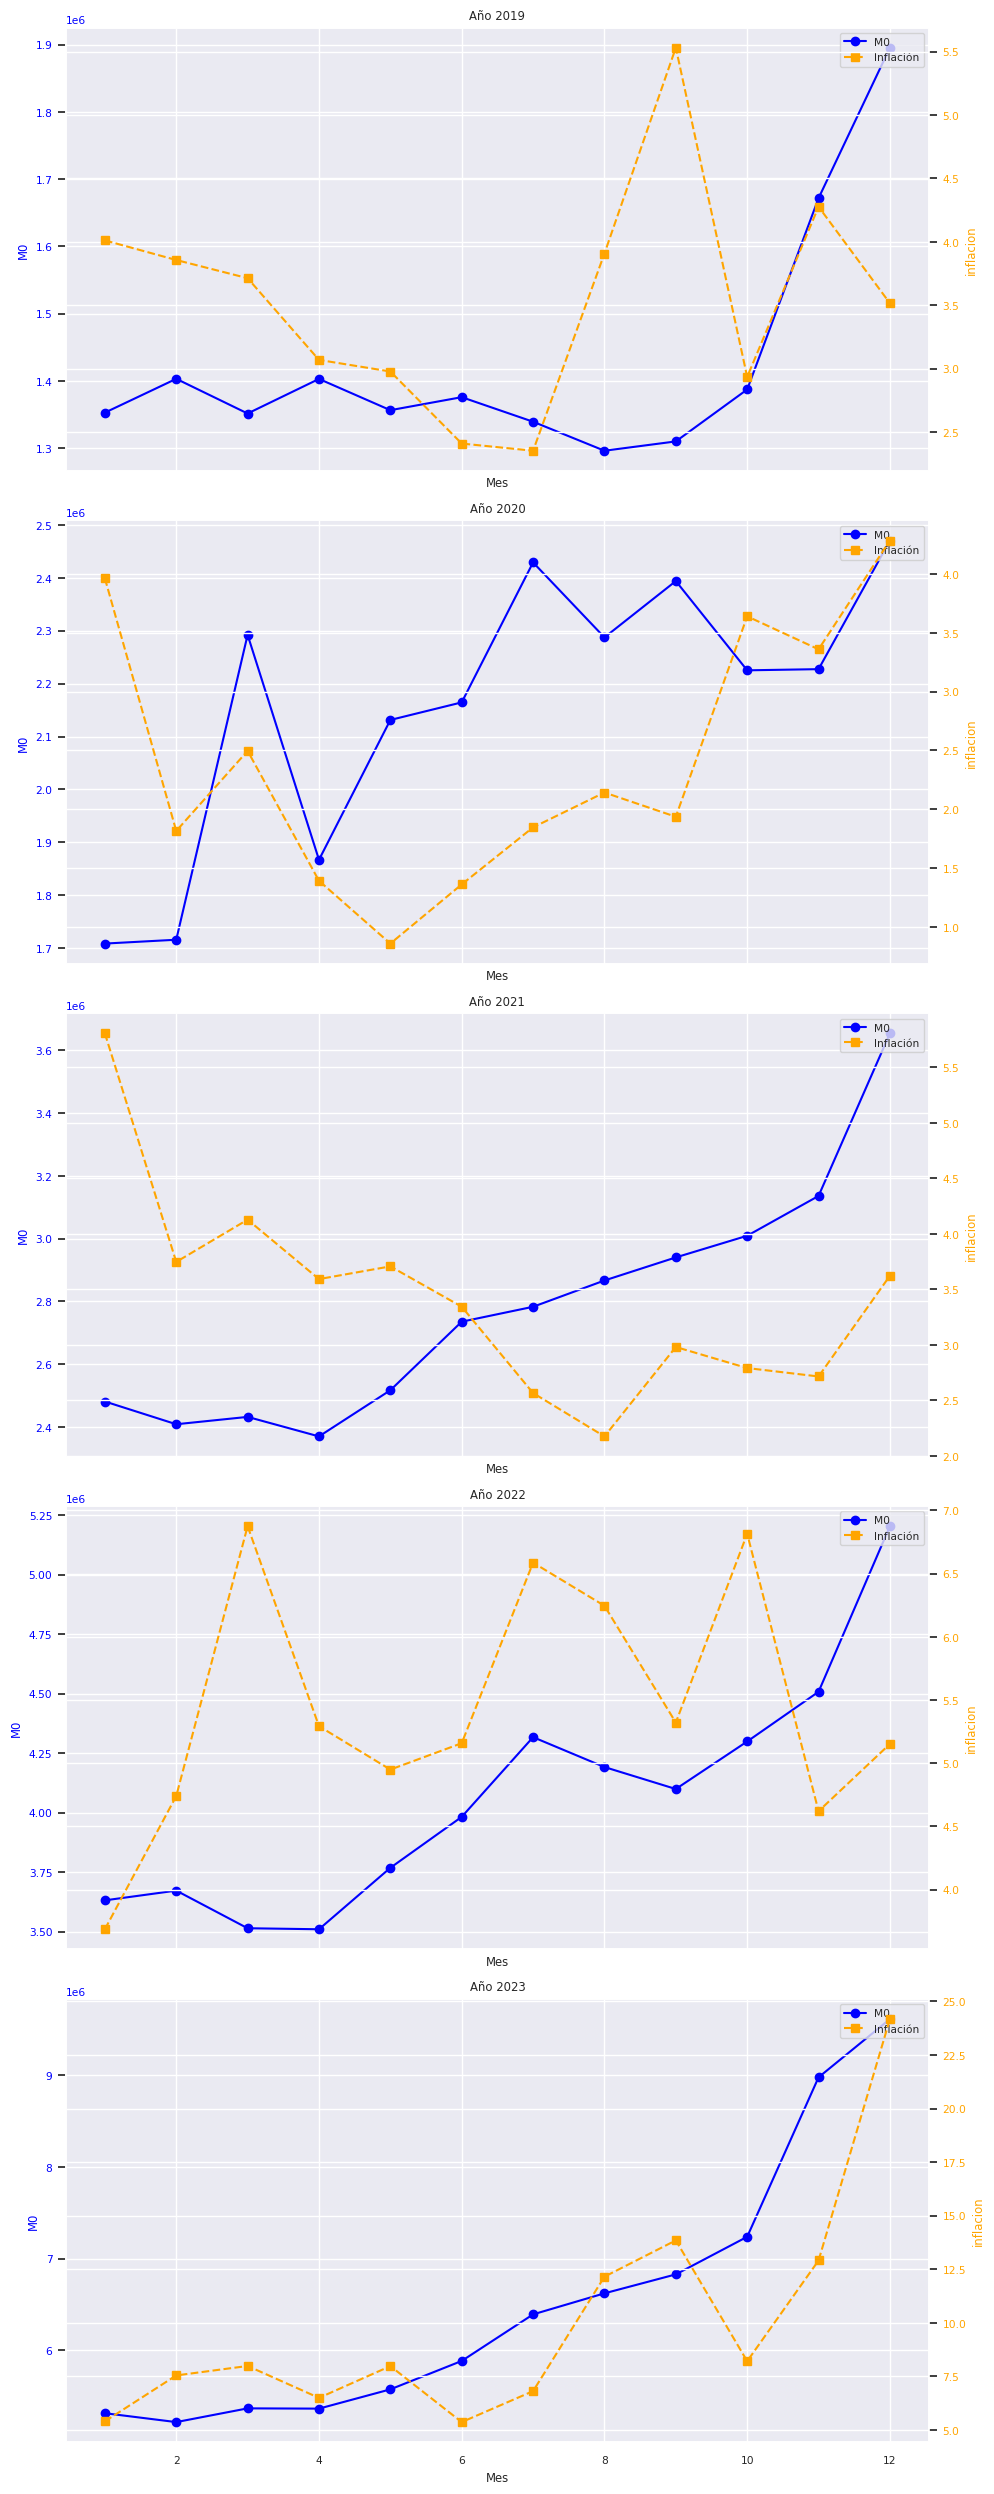

In [ ]:
datos['año'] = datos.index.year
años = range(2019, 2024)  # Rango de años disponibles
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['M0'], marker='o', linestyle='-', color='blue', label='M0')
    ax.set_ylabel('M0', color='blue')
    ax.set_xlabel('Mes')
    ax.grid(True)
    ax.tick_params(axis='y', labelcolor='blue')

    # Crear un segundo eje y
    ax2 = ax.twinx()
    ax2.plot(datos_año.index.month, datos_año['inflacion'], marker='s', linestyle='--', color='orange', label='Inflación')
    ax2.set_ylabel('inflacion', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax.set_title(f'Año {año}')

    # Añadir leyendas
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

<ipython-input-57-4b989162b1a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['año'] = datos.index.year


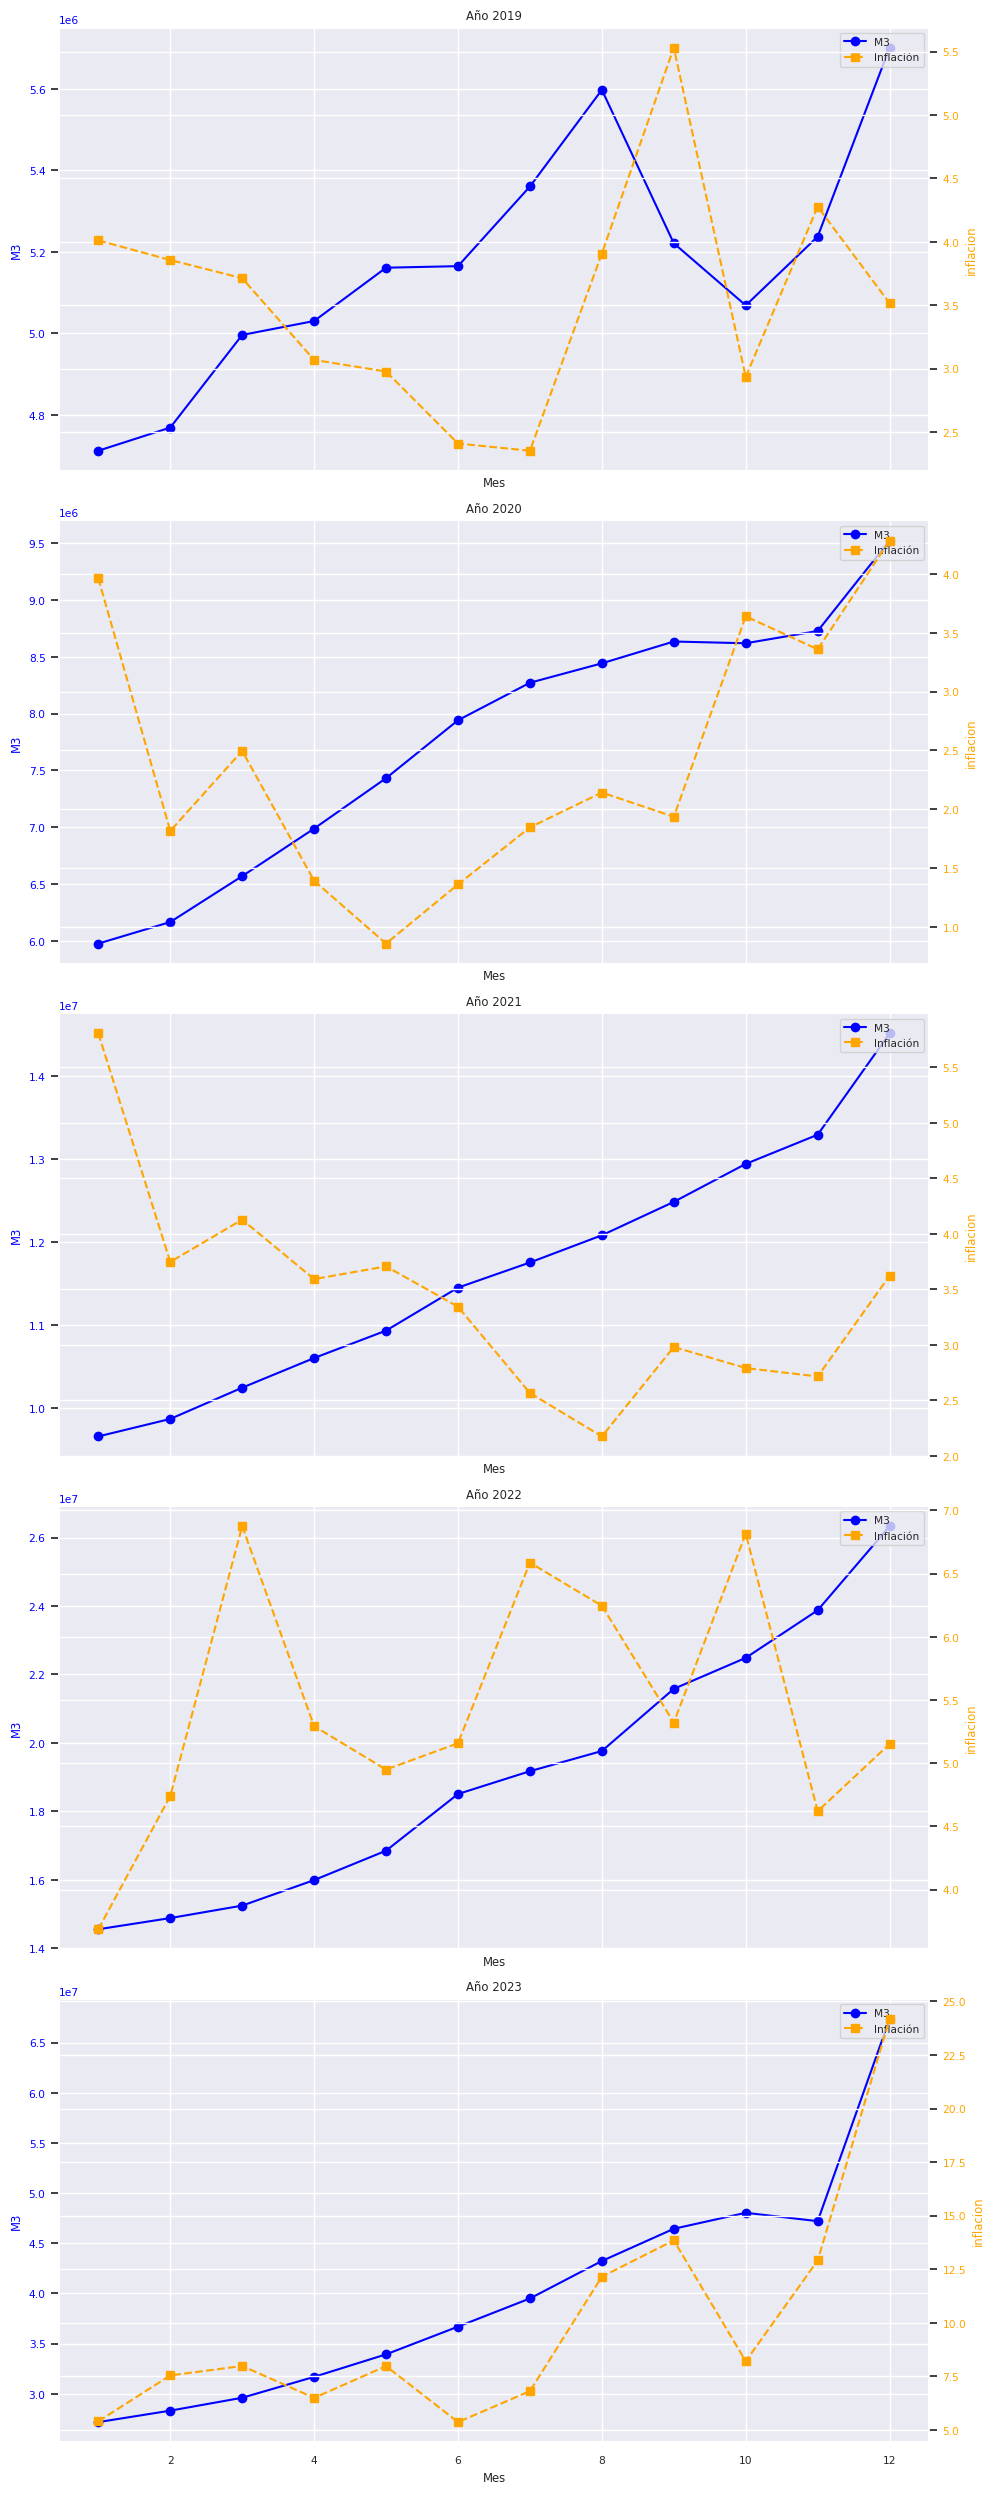

In [ ]:
datos['año'] = datos.index.year
años = range(2019, 2024)  # Rango de años disponibles
fig, axs = plt.subplots(len(años), 1, figsize=(10, 5 * len(años)), sharex=True)

for i, año in enumerate(años):
    datos_año = datos[datos['año'] == año]

    # Paso 3: Graficar la serie de tiempo para cada año en un subplot separado
    ax = axs[i]
    ax.plot(datos_año.index.month, datos_año['M3'], marker='o', linestyle='-', color='blue', label='M3')
    ax.set_ylabel('M3', color='blue')
    ax.set_xlabel('Mes')
    ax.grid(True)
    ax.tick_params(axis='y', labelcolor='blue')

    # Crear un segundo eje y
    ax2 = ax.twinx()
    ax2.plot(datos_año.index.month, datos_año['inflacion'], marker='s', linestyle='--', color='orange', label='Inflación')
    ax2.set_ylabel('inflacion', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax.set_title(f'Año {año}')

    # Añadir leyendas
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

## Selección columnas

In [ ]:
datos.columns

Index(['IPC_NG', 'IPC_Nucleo', 'M0', 'M3', 'TCN', 'emae_des', 'emae_orig',
       'Pasivos', 'inflacion', 'Inflacion_Nucleo', 'mes', 'año', 'M0_lag6',
       'M0_lag8', 'M0_lag18', 'M0_lag24', 'M3_lag6', 'M3_lag8', 'M3_lag18',
       'M3_lag24', 'Pasivos_lag6', 'Pasivos_lag8', 'Pasivos_lag18',
       'Pasivos_lag24'],
      dtype='object')

In [ ]:
df_original = datos[['TCN', 'emae_des', 'emae_orig',
       'inflacion',  'M0_lag6', 'M3_lag6', 'Pasivos_lag6']]

In [ ]:
df = df_original.copy()

# División Train - Test - Validación

In [ ]:
df.describe()

,TCN,emae_des,emae_orig,inflacion,M0_lag6,M3_lag6,Pasivos_lag6
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01,61.000000
mean,139.540984,142.180328,142.098361,5.249051,2.812116e+06,1.274512e+07,4245.557377
std,136.660964,8.601372,9.994507,4.285044,1.427983e+06,9.072599e+06,3880.027721
min,37.000000,106.000000,113.000000,0.857633,1.066809e+06,3.844518e+06,727.000000
25%,66.000000,140.000000,135.000000,2.977667,1.408977e+06,5.360525e+06,1245.000000
50%,96.000000,144.000000,143.000000,3.962264,2.428900e+06,9.662324e+06,2789.000000
75%,153.000000,148.000000,149.000000,5.807365,3.672002e+06,1.598932e+07,5203.000000
max,818.000000,152.000000,164.000000,24.180494,6.392700e+06,3.949802e+07,16144.000000


In [ ]:
len_df=len(df.inflacion)
len_train=round(len_df*0.6)
print('la longitud del conjunto de entrenamiento es:',len_train)
len_test=round(len_df*0.4)
print('la longitud del conjunto de test es:',len_test)
#len_val=len_df - len_train - len_test
#print('la longitud del conjunto de validación es:',len_val)

la longitud del conjunto de entrenamiento es: 37
la longitud del conjunto de test es: 24


In [ ]:
fechas_train = pd.date_range(start=datos.index.min(), periods=len_train, freq='MS')
fechas_test = pd.date_range(start=fechas_train[-1] + pd.DateOffset(months=1), periods=len_test, freq='MS')
#fechas_val=pd.date_range(start=fechas_test[-1] + pd.DateOffset(months=1), periods=25, freq='MS')

print(f"Fechas train : {fechas_train[0]} --- {fechas_train[-1]}  (n={len(datos.loc[:fechas_train[-1]])})")
print(f"Fechas test : {fechas_test[0]} --- {fechas_test[-1]}  (n={len(datos.loc[fechas_test[0]:fechas_test[-1]])})")
#print(f"Fechas validación : {fechas_val[0]} --- {fechas_val[-1]}  (n={len(datos.loc[fechas_val[0]:fechas_val[-1]])})")

Fechas train : 2019-01-01 00:00:00 --- 2022-01-01 00:00:00  (n=37)
Fechas test : 2022-02-01 00:00:00 --- 2024-01-01 00:00:00  (n=24)


In [ ]:
df_train = df.loc[:fechas_train[-1]]
df_test  = df.loc[fechas_test[0]:fechas_test[-1]]
#df_val =  df.loc[fechas_val[0]:fechas_val[-1]]

In [ ]:
x_train = df_train.drop(columns=['inflacion'])
y_train = df_train['inflacion']

x_test = df_test.drop(columns=['inflacion'])
y_test = df_test['inflacion']

#x_val = df_val.drop(columns=['IPC_NG', 'IPC_Nucleo'])
#y_val = df_val['IPC_NG']

In [ ]:
print(x_train.shape)
print(y_train.shape)

(37, 6)
(37,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(24, 6)
(24,)


In [ ]:
#print(x_val.shape)
#print(y_val.shape)

## Gráfico

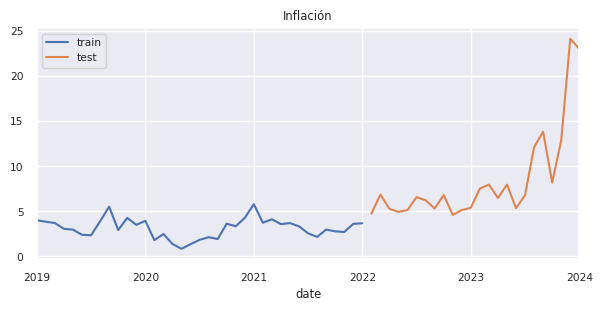

In [ ]:
fig, ax=plt.subplots(figsize=(7,3))
df_train['inflacion'].plot(ax=ax,label='train')
df_test ['inflacion'].plot(ax=ax, label='test')
#df_val['IPC_NG'].plot(ax=ax, label ='validacion')
ax.set_title('Inflación')
ax.legend();

# Modelado y evaluación de métricas

#### XGBRegressor

In [ ]:
# Evalúo df_hot con XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)


MAE_xgb = mean_absolute_error(y_test, y_pred_xgb)
MSE_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Resultados de XGBRegressor:")
print("MAE:", MAE_xgb)
print("MSE:", MSE_xgb)
print("R2:", r2_xgb)

Resultados de XGBRegressor:
MAE: 5.047789088527705
MSE: 51.37512654272288
R2: -0.9107572564631361


#### Histogram-Based Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Crear el modelo HistGradientBoostingRegressor
hist_gb_reg = HistGradientBoostingRegressor()
hist_gb_reg.fit(x_train, y_train)
y_pred_hist_gb = hist_gb_reg.predict(x_test)

# Calcular las métricas de evaluación
MAE_hist_gb = mean_absolute_error(y_test, y_pred_hist_gb)
MSE_hist_gb = mean_squared_error(y_test, y_pred_hist_gb)
r2_hist_gb = r2_score(y_test, y_pred_hist_gb)

print("Resultados de HistGradientBoostingRegressor_Hot:")
print("MAE:", MAE_hist_gb)
print("MSE:", MSE_hist_gb)
print("R2:", r2_hist_gb)

Resultados de HistGradientBoostingRegressor_Hot:
MAE: 5.337200379456636
MSE: 55.373019907185075
R2: -1.0594479609105396


Escalado -- para la técnica que lo requiera

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



#### Arbol de Decisión

In [ ]:

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(x_train_scaled, y_train)
tree_pred = tree.predict(x_test_scaled)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print("Árbol de Decisión_Hot - MSE:", tree_mse, "MAE:", tree_mae, "R-squared:", tree_r2)

Árbol de Decisión_Hot - MSE: 50.29790366805039 MAE: 4.85208702082616 R-squared: -0.8706928991929523


####  Red Neuronal

In [ ]:
# Red Neuronal (MLP)

from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(random_state=42)
mlp.fit(x_train_scaled, y_train)
mlp_pred = mlp.predict(x_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

print("Red Neuronal (MLP)_Hot - MSE:", mlp_mse, "MAE:", mlp_mae, "R-squared:", mlp_r2)

Red Neuronal (MLP)_Hot - MSE: 71.36612056956896 MAE: 6.449991923116844 R-squared: -1.6542675788940198


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Regresión Ridge

In [ ]:
# Regresión Ridge

from sklearn.linear_model import LinearRegression, Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
ridge_pred = ridge.predict(x_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Regresión Ridge_Hot - MSE:", ridge_mse, "MAE:", ridge_mae, "R-squared:", ridge_r2)

Regresión Ridge_Hot - MSE: 37.29925698895314 MAE: 4.643917246007073 R-squared: -0.3872438035370773


#### Light GBM

In [ ]:
len_df=len(df.inflacion)
len_train=round(len_df*0.6)
print('la longitud del conjunto de entrenamiento es:',len_train)
len_test=round(len_df*0.2)
print('la longitud del conjunto de test es:',len_test)
len_val=len_df - len_train - len_test
print('la longitud del conjunto de validación es:',len_val)

la longitud del conjunto de entrenamiento es: 37
la longitud del conjunto de test es: 12
la longitud del conjunto de validación es: 12


In [ ]:
fechas_train = pd.date_range(start=datos.index.min(), periods=len_train, freq='MS')
fechas_test = pd.date_range(start=fechas_train[-1] + pd.DateOffset(months=1), periods=len_test, freq='MS')
fechas_val=pd.date_range(start=fechas_test[-1] + pd.DateOffset(months=1), periods=len_val, freq='MS')

print(f"Fechas train : {fechas_train[0]} --- {fechas_train[-1]}  (n={len(datos.loc[:fechas_train[-1]])})")
print(f"Fechas test : {fechas_test[0]} --- {fechas_test[-1]}  (n={len(datos.loc[fechas_test[0]:fechas_test[-1]])})")
print(f"Fechas validación : {fechas_val[0]} --- {fechas_val[-1]}  (n={len(datos.loc[fechas_val[0]:fechas_val[-1]])})")

Fechas train : 2019-01-01 00:00:00 --- 2022-01-01 00:00:00  (n=37)
Fechas test : 2022-02-01 00:00:00 --- 2023-01-01 00:00:00  (n=12)
Fechas validación : 2023-02-01 00:00:00 --- 2024-01-01 00:00:00  (n=12)


In [ ]:
df_train_LGBM = df.loc[:fechas_train[-1]]
df_test_LGBM  = df.loc[fechas_test[0]:fechas_test[-1]]
df_val_LGBM =  df.loc[fechas_val[0]:fechas_val[-1]]

In [ ]:
x_train_LGBM = df_train_LGBM.drop(columns=['inflacion'])
y_train_LGBM = df_train_LGBM['inflacion']

x_test_LGBM = df_test_LGBM.drop(columns=['inflacion'])
y_test_LGBM = df_test_LGBM['inflacion']

x_val_LGBM = df_val_LGBM.drop(columns=['inflacion'])
y_val_LGBM = df_val_LGBM['inflacion']

In [ ]:
print(x_train_LGBM.shape)
print(y_train_LGBM.shape)

(37, 6)
(37,)


In [ ]:
print(x_test_LGBM.shape)
print(y_test_LGBM.shape)

(12, 6)
(12,)


In [ ]:
print(x_val_LGBM.shape)
print(y_val_LGBM.shape)

(12, 6)
(12,)


In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Split the data into train and validation sets
#x_train, x_valid, y_train, y_valid = train_test_split(x_train_h, y_train_h, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(x_train_LGBM, label=y_train_LGBM)
valid_data = lgb.Dataset(x_val_LGBM, label=y_val_LGBM, reference=train_data)


# Define parameters for the LightGBM model
params = {
    'objective': 'regression',  # For binary classification, change this as needed
    'metric': 'mae',  # Use appropriate metric for your problem
    'boosting_type': 'gbdt',
    'max_depth': 10, #Maximum depth of the tree.
    'num_leaves': 30, # The maximum number of leaves in one tree.
    'n_estimators': 350,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'verbose': -1,
    'min_data_in_leaf': 15  # You can add this parameter to control the minimum number of data in a leaf node
}


# Train the LightGBM model
num_round = 100  # You can adjust the number of boosting rounds
bst_h = lgb.train(params, train_data, num_round, valid_sets=[valid_data])
# Enable early stopping
#bst = lgb.early_stopping(stopping_rounds=10, verbose=True)

# Make predictions on the validation set
#y_pred = bst.predict(x_valid_h, num_iteration=bst.best_iteration)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
# Make predictions on the validation set
y_lgbm_pred = bst_h.predict(x_val_LGBM, num_iteration=bst_h.best_iteration)

MAE_LGBM = mean_absolute_error(y_val_LGBM, y_lgbm_pred)
MSE_LGBM = mean_squared_error(y_val_LGBM, y_lgbm_pred)
r2_LGBM = r2_score(y_val_LGBM, y_lgbm_pred)
print("Resultados de LightGBM-Regressor-Hot in validation data:")
print("MAE:", MAE_LGBM)
print("MSE:", MSE_LGBM)
print("R2:", r2_LGBM)

# Make predictions on the test set
y_lgbm_pred_test = bst_h.predict(x_test_LGBM, num_iteration=bst_h.best_iteration)

# Compute metrics for the test set
lgbm_MAE_test = mean_absolute_error(y_test_LGBM, y_lgbm_pred_test)
lgbm_MSE_test = mean_squared_error(y_test_LGBM, y_lgbm_pred_test)
lgbm_r2_test= r2_score(y_test_LGBM, y_lgbm_pred_test)

print("Resultados de LightGBM-Regressor-Hot in TEST data:")
print("MAE (Test):", lgbm_MAE_test)
print("MSE (Test):", lgbm_MSE_test)
print("R2 (Test):", lgbm_r2_test)

# Save or use the trained model (if needed)
# bst.save_model('model.txt')


Resultados de LightGBM-Regressor-Hot in validation data:
MAE: 8.055546033982724
MSE: 101.30837222993303
R2: -1.7776847677352339
Resultados de LightGBM-Regressor-Hot in TEST data:
MAE (Test): 2.278344711895401
MSE (Test): 5.791424197257701
R2 (Test): -8.619512152694309


#### Resumen Métricas

In [ ]:
from tabulate import tabulate

# Resultados de XGBRegressor
xgb_results = {
    "Modelo": "XGBRegressor",
    "MAE": MAE_xgb,
    "MSE": MSE_xgb,
    "R2": r2_xgb
}

# Resultados de HistGradientBoostingRegressor
hist_gb_results = {
    "Modelo": "HistGradientBoostingRegressor",
    "MAE": MAE_hist_gb,
    "MSE": MSE_hist_gb,
    "R2": r2_hist_gb
}

# Resultados de Árbol de Decisión
tree_results = {
    "Modelo": "Árbol de Decisión-Hot",
    "MAE": tree_mae,
    "MSE": tree_mse,
    "R2": tree_r2
}


# Resultados de Red Neuronal (MLP)
mlp_results = {
    "Modelo": "Red Neuronal (MLP)",
    "MAE": mlp_mae,
    "MSE": mlp_mse,
    "R2": mlp_r2
}

# Resultados de Regresión Ridge
ridge_results = {
    "Modelo": "Regresión Ridge",
    "MAE": ridge_mae,
    "MSE": ridge_mse,
    "R2": ridge_r2
}

# Resultados de Regresión LightGBM
lgbm_results = {
    "Modelo": "Regresión LightGBM-Hot",
    "MAE": lgbm_MAE_test,
    "MSE": lgbm_MSE_test,
    "R2": lgbm_r2_test
}



# Organiza todos los resultados en una lista
results_list = [xgb_results,  hist_gb_results,
                tree_results, mlp_results,
                ridge_results, lgbm_results]

# Convierte la lista de resultados en un DataFrame usando pandas
results_df = pd.DataFrame(results_list)

In [ ]:
# Ordena el DataFrame por la columna "MAE" de mayor a menor
results_df = results_df.sort_values(by="MAE", ascending=True)

In [ ]:
# Imprimir la tabla usando tabulate
tabla = tabulate(results_df, headers='keys', tablefmt='grid', showindex=False)

print(tabla)

+-------------------------------+---------+----------+-----------+
| Modelo                        |     MAE |      MSE |        R2 |
+===============================+=========+==========+===========+
| Regresión LightGBM-Hot        | 2.27834 |  5.79142 | -8.61951  |
+-------------------------------+---------+----------+-----------+
| Regresión Ridge               | 4.64392 | 37.2993  | -0.387244 |
+-------------------------------+---------+----------+-----------+
| Árbol de Decisión-Hot         | 4.85209 | 50.2979  | -0.870693 |
+-------------------------------+---------+----------+-----------+
| XGBRegressor                  | 5.04779 | 51.3751  | -0.910757 |
+-------------------------------+---------+----------+-----------+
| HistGradientBoostingRegressor | 5.3372  | 55.373   | -1.05945  |
+-------------------------------+---------+----------+-----------+
| Red Neuronal (MLP)            | 6.44999 | 71.3661  | -1.65427  |
+-------------------------------+---------+----------+--------

# Resultados

In [ ]:
# Plot predictions
# ==============================================================================
# Convertir ridge_pred a un pandas.Series
LGBM_pred_series = pd.Series(y_lgbm_pred_test, index=y_test.index)

# Graficar
fig, ax = plt.subplots(figsize=(7, 3.5))
y_train.plot(ax=ax, label='train')
y_test.plot(ax=ax, label='test')
LGBM_pred_series.plot(ax=ax, label='predictions')
ax.legend()

ValueError: Length of values (12) does not match length of index (24)